<a href="https://colab.research.google.com/github/nguyentranhuy99/Machine-Learning/blob/main/HaNoi_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("2000-2025.csv")
df

<ipython-input-3-80013a206dc9>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2000-2025.csv")


,location,datetime,temperature,pressure,wind_speed,cloud,humidity,dew_point,sea_level_pressure,wind_direction,solar_rad,precipitation
0,Ha Noi,2000-01-01 07:00:00,17.0,1015,0.80,100,98,16.7,1017,66.0,37.0,0.0
1,Ha Noi,2000-01-01 08:00:00,16.7,1016,0.80,100,98,16.4,1018,54.0,86.0,0.0
2,Ha Noi,2000-01-01 09:00:00,18.5,1016,0.80,100,91,17.0,1018,44.0,117.0,0.0
3,Ha Noi,2000-01-01 10:00:00,19.3,1017,1.20,100,87,17.1,1019,22.0,138.0,0.0
4,Ha Noi,2000-01-01 11:00:00,19.6,1016,1.20,100,81,16.3,1018,20.0,153.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
202953,NaN,2023-02-25 16:00:00,24.0,1023,2.00,0,28,4.4,1023,360.0,416.0,0.0
202954,NaN,2023-02-25 17:00:00,22.6,1023,1.66,0,34,5.9,1024,360.0,176.0,0.0
202955,NaN,2023-02-25 18:00:00,21.1,1023,1.33,0,40,7.0,1024,360.0,0.0,0.0
202956,NaN,2023-02-25 19:00:00,19.7,1024,1.00,40,47,8.1,1025,360.0,0.0,0.0


# **Xử lý dữ liệu đầu vào**

In [ ]:

df['datetime'] = pd.to_datetime(df['datetime'])

rain_hour = 0
rain_hour_list = []

for i in range(len(df)):
    if df.loc[i, 'precipitation'] > 0:  # Nếu có mưa
        if i > 0 and df.loc[i - 1, 'precipitation'] > 0:  # Mưa nối tiếp
            delta = (df.loc[i, 'datetime'] - df.loc[i - 1, 'datetime']).seconds / 3600
            rain_hour += delta
        else:  # Bắt đầu cơn mưa mới
            rain_hour = 1  # Giờ đầu tiên
    else:  # Không mưa
        rain_hour = 0
    rain_hour_list.append(rain_hour)

df['rain_hour'] = rain_hour_list

unrain_hour = 0
unrain_hour_list = []

for i in range(len(df)):
    if df.loc[i, 'precipitation'] == 0:
        if i > 0 and df.loc[i - 1, 'precipitation'] == 0:  # Mưa nối tiếp
            delta = (df.loc[i, 'datetime'] - df.loc[i - 1, 'datetime']).seconds / 3600
            unrain_hour += delta
        else:
            unrain_hour = 1
    else:
        unrain_hour = 0
    unrain_hour_list.append(unrain_hour)

df['unrain_hour'] = unrain_hour_list

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

df.drop(columns=['datetime'], inplace=True)
df.drop(columns=['location'], inplace=True)
df.drop(columns=['wind_speed'], inplace=True)
df.drop(columns=['wind_direction'], inplace=True)
df.drop(columns=['sea_level_pressure'], inplace = True)
df

,temperature,pressure,cloud,humidity,dew_point,solar_rad,precipitation,rain_hour,unrain_hour,year,month,day,hour
0,17.0,1015,100,98,16.7,37.0,0.0,0.0,1.0,2000,1,1,7
1,16.7,1016,100,98,16.4,86.0,0.0,0.0,2.0,2000,1,1,8
2,18.5,1016,100,91,17.0,117.0,0.0,0.0,3.0,2000,1,1,9
3,19.3,1017,100,87,17.1,138.0,0.0,0.0,4.0,2000,1,1,10
4,19.6,1016,100,81,16.3,153.0,0.0,0.0,5.0,2000,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202953,24.0,1023,0,28,4.4,416.0,0.0,0.0,10.0,2023,2,25,16
202954,22.6,1023,0,34,5.9,176.0,0.0,0.0,11.0,2023,2,25,17
202955,21.1,1023,0,40,7.0,0.0,0.0,0.0,12.0,2023,2,25,18
202956,19.7,1024,40,47,8.1,0.0,0.0,0.0,13.0,2023,2,25,19


# **Tương quan dữ liệu đầu vào**

In [ ]:
df.corr()

,temperature,pressure,cloud,humidity,dew_point,solar_rad,precipitation,rain_hour,unrain_hour,year,month,day,hour
temperature,1.000000,-0.812125,-0.161704,-0.201506,0.841030,0.352486,0.068980,0.016648,-0.263348,0.070010,0.207225,-2.437150e-04,1.576528e-01
pressure,-0.812125,1.000000,0.030966,-0.139206,-0.848551,-0.068094,-0.139094,-0.092300,0.289444,0.060520,-0.034118,6.724489e-03,-4.654576e-02
cloud,-0.161704,0.030966,1.000000,0.227984,-0.021597,-0.307928,0.116229,0.130675,-0.198663,-0.038408,-0.192801,2.021946e-02,-8.384717e-02
humidity,-0.201506,-0.139206,0.227984,1.000000,0.355235,-0.519467,0.140084,0.168131,-0.151799,-0.078740,-0.087527,3.304988e-03,-2.961030e-01
dew_point,0.841030,-0.848551,-0.021597,0.355235,1.000000,0.045803,0.139541,0.103372,-0.335669,0.020123,0.147239,2.938265e-03,1.876428e-04
solar_rad,0.352486,-0.068094,-0.307928,-0.519467,0.045803,1.000000,-0.051447,-0.034958,0.007632,0.064693,0.048622,-3.826912e-03,4.994813e-02
precipitation,0.068980,-0.139094,0.116229,0.140084,0.139541,-0.051447,1.000000,0.407869,-0.157448,0.070429,0.032084,1.114125e-02,-1.550667e-02
rain_hour,0.016648,-0.092300,0.130675,0.168131,0.103372,-0.034958,0.407869,1.000000,-0.155715,0.090309,0.057023,4.584565e-03,-1.996852e-02
unrain_hour,-0.263348,0.289444,-0.198663,-0.151799,-0.335669,0.007632,-0.157448,-0.155715,1.000000,-0.151823,0.039968,5.010224e-03,-1.878280e-03
year,0.070010,0.060520,-0.038408,-0.078740,0.020123,0.064693,0.070429,0.090309,-0.151823,1.000000,-0.009083,-3.536096e-04,-1.313601e-04


In [ ]:
rain_hour = df['rain_hour'].astype(bool).sum()

print(rain_hour)
print(f"{rain_hour * 100 / len(df):.2f}%")

36605
16.76%


# **Chia dữ liệu thành tập train và kiểm tra thực nghiệm**

In [ ]:
train_df = df.iloc[:-720].reset_index(drop=True)
test_df = df.iloc[-720:].reset_index(drop=True) # Từ 07:00:00 2024-11-01 đến 06:00:00 2024-12-01

# **Huấn luyện các mô hình con**

## **Nhiệt độ**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Chuẩn bị dữ liệu
temp_X = train_df
temp_X = temp_X.iloc[:-1].reset_index(drop=True)
temp_y = train_df['temperature']
temp_y = temp_y.iloc[1:].reset_index(drop=True)

# Chia dữ liệu
temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(temp_X, temp_y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Random Forest
temp_rf_model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)
temp_rf_model.fit(temp_X_train, temp_y_train)

# Dự đoán
temp_y_pred = temp_rf_model.predict(temp_X_test)

# Tính toán các chỉ số đánh giá
temp_mse = mean_squared_error(temp_y_test, temp_y_pred)
temp_rmse = np.sqrt(temp_mse)
temp_me = np.mean(temp_y_test - temp_y_pred)
temp_mae = mean_absolute_error(temp_y_test, temp_y_pred)
temp_r2 = r2_score(temp_y_test, temp_y_pred)
temp_r = np.corrcoef(temp_y_test, temp_y_pred)[0, 1]

# In kết quả
print(f"Mean Error (ME): {temp_me:.2f}")
print(f"Mean Absolute Error (MAE): {temp_mae:.2f}")
print(f"Mean Squared Error (MSE): {temp_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {temp_rmse:.2f}")
print(f"R^2 Score: {temp_r2:.2f}")
print(f"Correlation Coefficient (R): {temp_r:.2f}")

Mean Error (ME): 0.00
Mean Absolute Error (MAE): 0.31
Mean Squared Error (MSE): 0.21
Root Mean Squared Error (RMSE): 0.46
R^2 Score: 0.99
Correlation Coefficient (R): 1.00


## **Áp suất**

In [ ]:
pres_X = train_df
pres_X = pres_X.iloc[:-1].reset_index(drop=True)
pres_y = train_df['pressure']
pres_y = pres_y.iloc[1:].reset_index(drop=True)

pres_X_train, pres_X_test, pres_y_train, pres_y_test = train_test_split(pres_X, pres_y, test_size=0.2, random_state=42)

pres_rf_model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)

pres_rf_model.fit(pres_X_train, pres_y_train)

pres_y_pred = pres_rf_model.predict(pres_X_test)

pres_mse = mean_squared_error(pres_y_test, pres_y_pred)
pres_rmse = np.sqrt(pres_mse)
pres_me = np.mean(pres_y_test - pres_y_pred)
pres_mae = mean_absolute_error(pres_y_test, pres_y_pred)
pres_r2 = r2_score(pres_y_test, pres_y_pred)
pres_r = np.corrcoef(pres_y_test, pres_y_pred)[0, 1]

print(f"Mean Error (ME): {pres_me:.2f}")
print(f"Mean Absolute Error (MAE): {pres_mae:.2f}")
print(f"Mean Squared Error (MSE): {pres_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {pres_rmse:.2f}")
print(f"R^2 Score: {pres_r2:.2f}")
print(f"Correlation Coefficient (R): {pres_r:.2f}")

Mean Error (ME): 0.00
Mean Absolute Error (MAE): 0.45
Mean Squared Error (MSE): 0.28
Root Mean Squared Error (RMSE): 0.53
R^2 Score: 0.99
Correlation Coefficient (R): 1.00


## **Mây**

In [ ]:
cloud_X = train_df
cloud_X = cloud_X.iloc[:-1].reset_index(drop=True)
cloud_y = train_df['cloud']
cloud_y = cloud_y.iloc[1:].reset_index(drop=True)

cloud_X_train, cloud_X_test, cloud_y_train, cloud_y_test = train_test_split(cloud_X, cloud_y, test_size=0.2, random_state=42)

cloud_rf_model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)

cloud_rf_model.fit(cloud_X_train, cloud_y_train)

cloud_y_pred = cloud_rf_model.predict(cloud_X_test)

cloud_mse = mean_squared_error(cloud_y_test, cloud_y_pred)
cloud_rmse = np.sqrt(cloud_mse)
cloud_me = np.mean(cloud_y_test - cloud_y_pred)
cloud_mae = mean_absolute_error(cloud_y_test, cloud_y_pred)
cloud_r2 = r2_score(cloud_y_test, cloud_y_pred)
cloud_r = np.corrcoef(cloud_y_test, cloud_y_pred)[0, 1]

print(f"Mean Error (ME): {cloud_me:.2f}")
print(f"Mean Absolute Error (MAE): {cloud_mae:.2f}")
print(f"Mean Squared Error (MSE): {cloud_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {cloud_rmse:.2f}")
print(f"R^2 Score: {cloud_r2:.2f}")
print(f"Correlation Coefficient (R): {cloud_r:.2f}")

Mean Error (ME): 0.17
Mean Absolute Error (MAE): 5.87
Mean Squared Error (MSE): 103.21
Root Mean Squared Error (RMSE): 10.16
R^2 Score: 0.90
Correlation Coefficient (R): 0.95


## **Độ ẩm**

In [ ]:
rh_X = train_df
rh_X = rh_X.iloc[:-1].reset_index(drop=True)
rh_y = train_df['humidity']
rh_y = rh_y.iloc[1:].reset_index(drop=True)

rh_X_train, rh_X_test, rh_y_train, rh_y_test = train_test_split(rh_X, rh_y, test_size=0.2, random_state=42)

rh_rf_model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)

rh_rf_model.fit(rh_X_train, rh_y_train)

rh_y_pred = rh_rf_model.predict(rh_X_test)

rh_mse = mean_squared_error(rh_y_test, rh_y_pred)
rh_rmse = np.sqrt(rh_mse)
rh_me = np.mean(rh_y_test - rh_y_pred)
rh_mae = mean_absolute_error(rh_y_test, rh_y_pred)
rh_r2 = r2_score(rh_y_test, rh_y_pred)
rh_r = np.corrcoef(rh_y_test, rh_y_pred)[0, 1]

print(f"Mean Error (ME): {rh_me:.2f}")
print(f"Mean Absolute Error (MAE): {rh_mae:.2f}")
print(f"Mean Squared Error (MSE): {rh_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rh_rmse:.2f}")
print(f"R^2 Score: {rh_r2:.2f}")
print(f"Correlation Coefficient (R): {rh_r:.2f}")

Mean Error (ME): 0.01
Mean Absolute Error (MAE): 1.73
Mean Squared Error (MSE): 6.02
Root Mean Squared Error (RMSE): 2.45
R^2 Score: 0.97
Correlation Coefficient (R): 0.98


## **Điểm sương**

In [ ]:
dewpt_X = train_df
dewpt_X = dewpt_X.iloc[:-1].reset_index(drop=True)
dewpt_y = train_df['dew_point']
dewpt_y = dewpt_y.iloc[1:].reset_index(drop=True)

dewpt_X_train, dewpt_X_test, dewpt_y_train, dewpt_y_test = train_test_split(dewpt_X, dewpt_y, test_size=0.2, random_state=42)

dewpt_rf_model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)

dewpt_rf_model.fit(dewpt_X_train, dewpt_y_train)

dewpt_y_pred = dewpt_rf_model.predict(dewpt_X_test)

dewpt_mse = mean_squared_error(dewpt_y_test, dewpt_y_pred)
dewpt_rmse = np.sqrt(dewpt_mse)
dewpt_me = np.mean(dewpt_y_test - dewpt_y_pred)
dewpt_mae = mean_absolute_error(dewpt_y_test, dewpt_y_pred)
dewpt_r2 = r2_score(dewpt_y_test, dewpt_y_pred)
dewpt_r = np.corrcoef(dewpt_y_test, dewpt_y_pred)[0, 1]

print(f"Mean Error (ME): {dewpt_me:.2f}")
print(f"Mean Absolute Error (MAE): {dewpt_mae:.2f}")
print(f"Mean Squared Error (MSE): {dewpt_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {dewpt_rmse:.2f}")
print(f"R^2 Score: {dewpt_r2:.2f}")
print(f"Correlation Coefficient (R): {dewpt_r:.2f}")

Mean Error (ME): 0.00
Mean Absolute Error (MAE): 0.30
Mean Squared Error (MSE): 0.19
Root Mean Squared Error (RMSE): 0.44
R^2 Score: 0.99
Correlation Coefficient (R): 1.00


## **Cường độ ánh sáng mặt trời**

In [ ]:
solar_rad_X = train_df
solar_rad_X = solar_rad_X.iloc[:-1].reset_index(drop=True)
solar_rad_y = train_df['solar_rad']
solar_rad_y = solar_rad_y.iloc[1:].reset_index(drop=True)

solar_rad_X_train, solar_rad_X_test, solar_rad_y_train, solar_rad_y_test = train_test_split(solar_rad_X, solar_rad_y, test_size=0.2, random_state=42)

solar_rad_rf_model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)

solar_rad_rf_model.fit(solar_rad_X_train, solar_rad_y_train)

solar_rad_y_pred = solar_rad_rf_model.predict(solar_rad_X_test)

solar_rad_mse = mean_squared_error(solar_rad_y_test, solar_rad_y_pred)
solar_rad_rmse = np.sqrt(solar_rad_mse)
solar_rad_me = np.mean(solar_rad_y_test - solar_rad_y_pred)
solar_rad_mae = mean_absolute_error(solar_rad_y_test, solar_rad_y_pred)
solar_rad_r2 = r2_score(solar_rad_y_test, solar_rad_y_pred)
solar_rad_r = np.corrcoef(solar_rad_y_test, solar_rad_y_pred)[0, 1]

print(f"Mean Error (ME): {solar_rad_me:.2f}")
print(f"Mean Absolute Error (MAE): {solar_rad_mae:.2f}")
print(f"Mean Squared Error (MSE): {solar_rad_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {solar_rad_rmse:.2f}")
print(f"R^2 Score: {solar_rad_r2:.2f}")
print(f"Correlation Coefficient (R): {solar_rad_r:.2f}")

Mean Error (ME): -0.31
Mean Absolute Error (MAE): 18.52
Mean Squared Error (MSE): 2586.34
Root Mean Squared Error (RMSE): 50.86
R^2 Score: 0.95
Correlation Coefficient (R): 0.98


## **Lượng mưa (precip1)**

In [ ]:
precip1_X = train_df
precip1_X = precip1_X.iloc[:-1].reset_index(drop=True)
precip1_y = train_df['precipitation']
precip1_y = precip1_y.iloc[1:].reset_index(drop=True)

precip1_X_train, precip1_X_test, precip1_y_train, precip1_y_test = train_test_split(precip1_X, precip1_y, test_size=0.2, random_state=42)

precip1_rf_model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)

precip1_rf_model.fit(precip1_X_train, precip1_y_train)

precip1_y_pred = precip1_rf_model.predict(precip1_X_test)

precip1_mse = mean_squared_error(precip1_y_test, precip1_y_pred)
precip1_rmse = np.sqrt(precip1_mse)
precip1_me = np.mean(precip1_y_test - precip1_y_pred)
precip1_mae = mean_absolute_error(precip1_y_test, precip1_y_pred)
precip1_r2 = r2_score(precip1_y_test, precip1_y_pred)
precip1_r = np.corrcoef(precip1_y_test, precip1_y_pred)[0, 1]

print(f"Mean Error (ME): {precip1_me:.2f}")
print(f"Mean Absolute Error (MAE): {precip1_mae:.2f}")
print(f"Mean Squared Error (MSE): {precip1_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {precip1_rmse:.2f}")
print(f"R^2 Score: {precip1_r2:.2f}")
print(f"Correlation Coefficient (R): {precip1_r:.2f}")

Mean Error (ME): -0.03
Mean Absolute Error (MAE): 0.19
Mean Squared Error (MSE): 0.36
Root Mean Squared Error (RMSE): 0.60
R^2 Score: 0.56
Correlation Coefficient (R): 0.76


## **Phân loại mưa hay không mưa**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, log_loss, matthews_corrcoef
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

rain_hour_X = train_df
rain_hour_X = rain_hour_X.iloc[:-1].reset_index(drop=True)
rain_hour_y = train_df['precipitation']
rain_hour_y = rain_hour_y.iloc[1:].reset_index(drop=True)
rain_hour_y = (rain_hour_y > 0).astype(int)

rain_hour_X_train, rain_hour_X_test, rain_hour_y_train, rain_hour_y_test = train_test_split(rain_hour_X, rain_hour_y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(rain_hour_X_train, rain_hour_y_train)

rain_hour_rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight = 'balanced', random_state=42)

rain_hour_rf_model.fit(X_resampled, y_resampled)

rain_hour_y_pred = rain_hour_rf_model.predict(rain_hour_X_test)

rain_hour_accuracy = accuracy_score(rain_hour_y_test, rain_hour_y_pred)
print(f"Accuracy: {rain_hour_accuracy:.2f}")

# Ma trận nhầm lẫn (confusion matrix)
rain_hour_conf_matrix = confusion_matrix(rain_hour_y_test, rain_hour_y_pred)
print(f"Confusion Matrix:\n{rain_hour_conf_matrix}")

# Precision, Recall, F1-Score
precision = precision_score(rain_hour_y_test, rain_hour_y_pred)
recall = recall_score(rain_hour_y_test, rain_hour_y_pred)
f1 = f1_score(rain_hour_y_test, rain_hour_y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# AUC (Area Under Curve) for ROC
rain_hour_y_pred_prob = rain_hour_rf_model.predict_proba(rain_hour_X_test)[:, 1]  # Probabilities for the positive class
auc = roc_auc_score(rain_hour_y_test, rain_hour_y_pred_prob)
print(f"AUC: {auc:.2f}")

# Log Loss
logloss = log_loss(rain_hour_y_test, rain_hour_y_pred_prob)
print(f"Log Loss: {logloss:.2f}")

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(rain_hour_y_test, rain_hour_y_pred)
print(f"MCC: {mcc:.2f}")

Accuracy: 0.92
Confusion Matrix:
[[34511  1748]
 [ 1753  5529]]
Precision: 0.76
Recall: 0.76
F1-Score: 0.76
AUC: 0.93
Log Loss: 0.26
MCC: 0.71


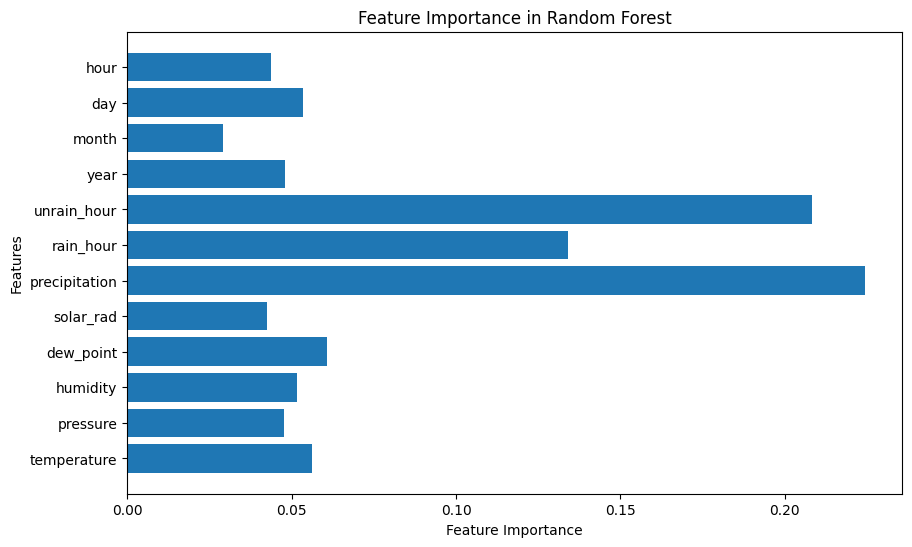

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(rain_hour_X_train, rain_hour_y_train)

# Lấy độ quan trọng của các đặc trưng
feature_importances = rf_model.feature_importances_

# Vẽ biểu đồ cột để trực quan hóa độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
plt.barh(rain_hour_X_train.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()


## **Mô hình dựa báo lượng mưa dựa trên các đặc trưng (pred2)**

In [ ]:
precip2_X = train_df.drop(['precipitation'], axis = 1)
precip2_y = train_df['precipitation']

precip2_X_train, precip2_X_test, precip2_y_train, precip2_y_test = train_test_split(precip2_X, precip2_y, test_size=0.2, random_state=42)

precip2_rf_model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)

precip2_rf_model.fit(precip2_X_train, precip2_y_train)

precip2_y_pred = precip2_rf_model.predict(precip2_X_test)

precip2_mse = mean_squared_error(precip2_y_test, precip2_y_pred)
precip2_rmse = np.sqrt(precip2_mse)
precip2_me = np.mean(precip2_y_test - precip2_y_pred)
precip2_mae = mean_absolute_error(precip2_y_test, precip2_y_pred)
precip2_r2 = r2_score(precip2_y_test, precip2_y_pred)
precip2_r = np.corrcoef(precip2_y_test, precip2_y_pred)[0, 1]

print(f"Mean Error (ME): {precip2_me:.2f}")
print(f"Mean Absolute Error (MAE): {precip2_mae:.2f}")
print(f"Mean Squared Error (MSE): {precip2_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {precip2_rmse:.2f}")
print(f"R^2 Score: {precip2_r2:.2f}")
print(f"Correlation Coefficient (R): {precip2_r:.2f}")

Mean Error (ME): -0.01
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.33
Root Mean Squared Error (RMSE): 0.57
R^2 Score: 0.62
Correlation Coefficient (R): 0.79


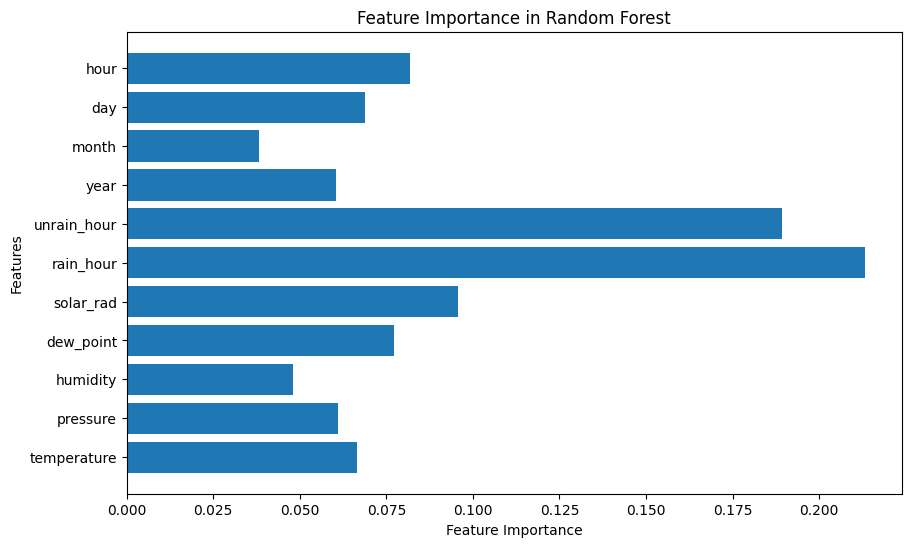

In [ ]:
import matplotlib.pyplot as plt

# Huấn luyện mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(precip2_X_train, precip2_y_train)

# Lấy độ quan trọng của các đặc trưng
feature_importances = rf_model.feature_importances_

# Vẽ biểu đồ cột để trực quan hóa độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
plt.barh(precip2_X_train.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()

## **Mô hình hồi quy tuyến tính của pred1 và pred2**

In [ ]:
from sklearn.linear_model import LinearRegression
precip_df_X1 = pd.DataFrame(precip1_rf_model.predict(precip1_X))

precip_df_X2 = pd.DataFrame(precip2_rf_model.predict(precip2_X))
precip_df_X2 = precip_df_X2.iloc[1:].reset_index(drop=True)

X = pd.concat([precip_df_X1, precip_df_X2], axis = 1)
y = train_df['precipitation'].iloc[1:].reset_index(drop=True)

r_model = LinearRegression()
r_model.fit(X, y)
y_pred = r_model.predict(X)

a, b = r_model.coef_
print(f"a = {a}, b = {b}")

me = np.mean(y - y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
r = np.corrcoef(y, y_pred)[0, 1]
# In ra kết quả
print(f"Mean Error (ME): {me:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Correlation Coefficient (R): {r:.2f}")

a = 0.4952808820182761, b = 0.635418108966886
Mean Error (ME): 0.00
Mean Squared Error (MSE): 0.07
Root Mean Squared Error (RMSE): 0.26
Mean Absolute Error (MAE): 0.09
R^2 Score: 0.92
Correlation Coefficient (R): 0.96


# **Lưu các mô hình**

In [ ]:
import joblib

# Lưu mô hình sau khi huấn luyện
joblib.dump(temp_rf_model, 'temp_rf_model.pkl')
joblib.dump(pres_rf_model, 'pres_rf_model.pkl')
joblib.dump(cloud_rf_model, 'cloud_rf_model.pkl')
joblib.dump(rh_rf_model, 'rh_rf_model.pkl')
joblib.dump(dewpt_rf_model, 'dewpt_rf_model.pkl')
joblib.dump(solar_rad_rf_model, 'solar_rad_rf_model.pkl')
joblib.dump(precip1_rf_model, 'precip1_rf_model.pkl')
joblib.dump(rain_hour_rf_model, 'rain_hour_rf_model.pkl')
joblib.dump(precip2_rf_model, 'precip2_rf_model.pkl')
joblib.dump(r_model, 'r_model.pkl')



['r_model.pkl']

In [ ]:
temp_rf_model = joblib.load('temp_rf_model.pkl')
pres_rf_model = joblib.load('pres_rf_model.pkl')
cloud_rf_model = joblib.load('cloud_rf_model.pkl')
rh_rf_model = joblib.load('rh_rf_model.pkl')
dewpt_rf_model = joblib.load('dewpt_rf_model.pkl')
solar_rad_rf_model = joblib.load('solar_rad_rf_model.pkl')
precip1_rf_model = joblib.load('precip1_rf_model.pkl')
rain_hour_rf_model = joblib.load('rain_hour_rf_model.pkl')
precip2_rf_model = joblib.load('precip2_rf_model.pkl')
r_model = joblib.load('r_model.pkl')


# **Dự báo**

In [ ]:
new_data = [[24.1, 1017, 100, 82, 20.8, 0, 0, 0, 5, 2024, 11, 5, 0]] #13 đặc trưng
pred = []
hour = 0
day = 5
month = 11
year = 2024
# a = 0.4952808820182761
# b = 0.635418108966886

pred_df = pd.DataFrame(columns = ['temperature', 'pressure', 'cloud', 'humidity', 'dew_point', 'solar_rad', 'precipitation', 'rain_hour', 'unrain_hour', 'year', 'month', 'day', 'hour'])
pred.append(new_data[0])

for i in range (1, 25):
    hour = hour + 1
    if hour > 23:
        hour = hour - 24
        day = day + 1

    if month in [4, 6, 9,11]:
        if day > 30:
            month = month + 1
            day = day - 30
    elif month in [1, 3, 5, 7, 8, 10, 12]:
        if day > 31:
            month = month + 1
            day = day - 31
    else:
        if day > 28:
            month = month + 1
            day = day - 28

    if month > 12:
        month = month - 12
        year = year + 1

    temp_pred = temp_rf_model.predict([pred[i - 1]])[0]
    pres_pred = pres_rf_model.predict([pred[i - 1]])[0]
    cloud_pred = cloud_rf_model.predict([pred[i - 1]])[0]
    rh_pred = rh_rf_model.predict([pred[i - 1]])[0]
    dewpt_pred = dewpt_rf_model.predict([pred[i - 1]])[0]
    solar_rad_pred = solar_rad_rf_model.predict([pred[i - 1]])[0]

    # rain_hour_pred = rain_hour_rf_model.predict([[pred[i - 1][10], pred[i - 1][11]]])
    rain_hour_pred = rain_hour_rf_model.predict([pred[i - 1]])[0]
    #rain_hour_pred = rain_hour_rf_model.predict([pred[i - 1]])[0]

    if rain_hour_pred == 0:
        precip_pred = 0
        rain_hour_pred = 0
        unrain_hour_pred = pred[i - 1][8] + 1
    else:
        rain_hour_pred = pred[i - 1][7] + 1
        unrain_hour_pred = 0
        pred2 = [temp_pred, pres_pred, cloud_pred, rh_pred, dewpt_pred, solar_rad_pred, rain_hour, unrain_hour_pred, year, month, day, hour]
        precip_pred = (a * precip1_rf_model.predict([pred[i-1]])[0]) + (b * precip2_rf_model.predict([pred2])[0])

    pred1 = [temp_pred, pres_pred, cloud_pred, rh_pred, dewpt_pred, solar_rad_pred, precip_pred, rain_hour_pred, unrain_hour_pred, year, month, day, hour]
    pred.append(pred1)
    new_row = {'temperature': temp_pred , 'pressure': pres_pred, 'cloud': cloud_pred, 'humidity': rh_pred, 'dew_point': dewpt_pred, 'solar_rad': solar_rad_pred, 'precipitation': precip_pred, 'rain_hour': rain_hour_pred, 'unrain_hour': unrain_hour_pred, 'year': year, 'month': month, 'day': day, 'hour': hour}
    new_row_df = pd.DataFrame([new_row])
    pred_df = pd.concat([pred_df, new_row_df], ignore_index = True)
pred_df
pred_df.to_csv('predict.csv', index=False)

<ipython-input-267-628780ef3dfd>:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pred_df = pd.concat([pred_df, new_row_df], ignore_index = True)


# **Thực nghiệm**

In [ ]:
test_df.to_csv('test.csv', index=False)
test_df

,temperature,pressure,cloud,humidity,dew_point,solar_rad,precipitation,rain_hour,unrain_hour,year,month,day,hour
0,24.0,1012,0,95,23.1,161,0.0,0.0,41.0,2024,11,1,7
1,26.0,1012,0,76,21.4,377,0.0,0.0,42.0,2024,11,1,8
2,28.0,1013,0,62,20.0,573,0.0,0.0,43.0,2024,11,1,9
3,30.0,1013,0,50,18.4,724,0.0,0.0,44.0,2024,11,1,10
4,30.6,1012,0,46,17.6,810,0.0,0.0,45.0,2024,11,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,17.0,1014,0,88,15.0,0,0.0,0.0,26.0,2024,12,1,2
716,16.0,1013,0,87,13.8,0,0.0,0.0,27.0,2024,12,1,3
717,16.8,1009,25,84,14.0,0,0.0,0.0,28.0,2024,12,1,4
718,16.0,1013,0,87,13.8,0,0.0,0.0,29.0,2024,12,1,5


## **Thực nghiệm một ngày không mưa (09/11/2024)**



In [ ]:
new_data = [[21.2, 1016, 0, 81, 17.8, 0, 0, 0, 19, 2024, 11, 9, 0]] #13 đặc trưng
pred = []
hour = 0
day = 9
month = 11
year = 2024
# a = 0.4952808820182761
# b = 0.635418108966886

pred_df = pd.DataFrame(columns = ['temperature', 'pressure', 'cloud', 'humidity', 'dew_point', 'solar_rad', 'precipitation', 'rain_hour', 'unrain_hour', 'year', 'month', 'day', 'hour'])
pred.append(new_data[0])

for i in range (1, 25):
    hour = hour + 1
    if hour > 23:
        hour = hour - 24
        day = day + 1

    if month in [4, 6, 9,11]:
        if day > 30:
            month = month + 1
            day = day - 30
    elif month in [1, 3, 5, 7, 8, 10, 12]:
        if day > 31:
            month = month + 1
            day = day - 31
    else:
        if day > 28:
            month = month + 1
            day = day - 28

    if month > 12:
        month = month - 12
        year = year + 1

    temp_pred = temp_rf_model.predict([pred[i - 1]])[0]
    pres_pred = pres_rf_model.predict([pred[i - 1]])[0]
    cloud_pred = cloud_rf_model.predict([pred[i - 1]])[0]
    rh_pred = rh_rf_model.predict([pred[i - 1]])[0]
    dewpt_pred = dewpt_rf_model.predict([pred[i - 1]])[0]
    solar_rad_pred = solar_rad_rf_model.predict([pred[i - 1]])[0]

    # rain_hour_pred = rain_hour_rf_model.predict([[pred[i - 1][10], pred[i - 1][11]]])
    rain_hour_pred = rain_hour_rf_model.predict([pred[i - 1]])[0]
    #rain_hour_pred = rain_hour_rf_model.predict([pred[i - 1]])[0]

    if rain_hour_pred == 0:
        precip_pred = 0
        rain_hour_pred = 0
        unrain_hour_pred = pred[i - 1][8] + 1
    else:
        rain_hour_pred = pred[i - 1][7] + 1
        unrain_hour_pred = 0
        pred2 = [temp_pred, pres_pred, cloud_pred, rh_pred, dewpt_pred, solar_rad_pred, rain_hour, unrain_hour_pred, year, month, day, hour]
        precip_pred = (a * precip1_rf_model.predict([pred[i-1]])[0]) + (b * precip2_rf_model.predict([pred2])[0])

    pred1 = [temp_pred, pres_pred, cloud_pred, rh_pred, dewpt_pred, solar_rad_pred, precip_pred, rain_hour_pred, unrain_hour_pred, year, month, day, hour]
    pred.append(pred1)
    new_row = {'temperature': temp_pred , 'pressure': pres_pred, 'cloud': cloud_pred, 'humidity': rh_pred, 'dew_point': dewpt_pred, 'solar_rad': solar_rad_pred, 'precipitation': precip_pred, 'rain_hour': rain_hour_pred, 'unrain_hour': unrain_hour_pred, 'year': year, 'month': month, 'day': day, 'hour': hour}
    new_row_df = pd.DataFrame([new_row])
    pred_df = pd.concat([pred_df, new_row_df], ignore_index = True)
pred_df

<ipython-input-334-42008f12c028>:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pred_df = pd.concat([pred_df, new_row_df], ignore_index = True)


,temperature,pressure,cloud,humidity,dew_point,solar_rad,precipitation,rain_hour,unrain_hour,year,month,day,hour
0,21.039,1015.81,11.77,82.60,17.692,0.00,0,0,20,2024,11,9,1
1,20.799,1015.59,16.38,85.78,17.658,0.00,0,0,21,2024,11,9,2
2,20.260,1015.64,21.38,88.30,17.703,0.00,0,0,22,2024,11,9,3
3,20.075,1015.89,19.96,89.54,17.772,0.00,0,0,23,2024,11,9,4
4,19.918,1016.60,22.38,89.18,17.848,0.00,0,0,24,2024,11,9,5
5,19.691,1017.48,24.96,88.68,17.842,0.00,0,0,25,2024,11,9,6
6,19.746,1017.60,29.62,88.76,17.864,143.02,0,0,26,2024,11,9,7
7,21.131,1018.18,32.78,79.20,17.041,351.64,0,0,27,2024,11,9,8
8,22.964,1018.14,31.21,69.71,16.919,537.03,0,0,28,2024,11,9,9
9,24.366,1018.39,29.30,60.92,16.488,680.79,0,0,29,2024,11,9,10


In [ ]:
real_df = test_df.iloc[186:210].reset_index(drop=True)
real_df

,temperature,pressure,cloud,humidity,dew_point,solar_rad,precipitation,rain_hour,unrain_hour,year,month,day,hour
0,20.6,1015,0,85,18.0,0,0.0,0.0,20.0,2024,11,9,1
1,20.3,1015,0,88,18.2,0,0.0,0.0,21.0,2024,11,9,2
2,20.0,1014,0,91,18.5,0,0.0,0.0,22.0,2024,11,9,3
3,19.7,1014,0,94,18.7,0,0.0,0.0,23.0,2024,11,9,4
4,19.6,1014,1,95,18.8,0,0.0,0.0,24.0,2024,11,9,5
5,19.6,1015,0,95,18.7,0,0.0,0.0,25.0,2024,11,9,6
6,19.5,1015,0,96,18.8,146,0.0,0.0,26.0,2024,11,9,7
7,21.7,1016,0,83,18.6,359,0.0,0.0,27.0,2024,11,9,8
8,23.8,1016,0,72,18.5,552,0.0,0.0,28.0,2024,11,9,9
9,26.0,1016,0,63,18.4,697,0.0,0.0,29.0,2024,11,9,10


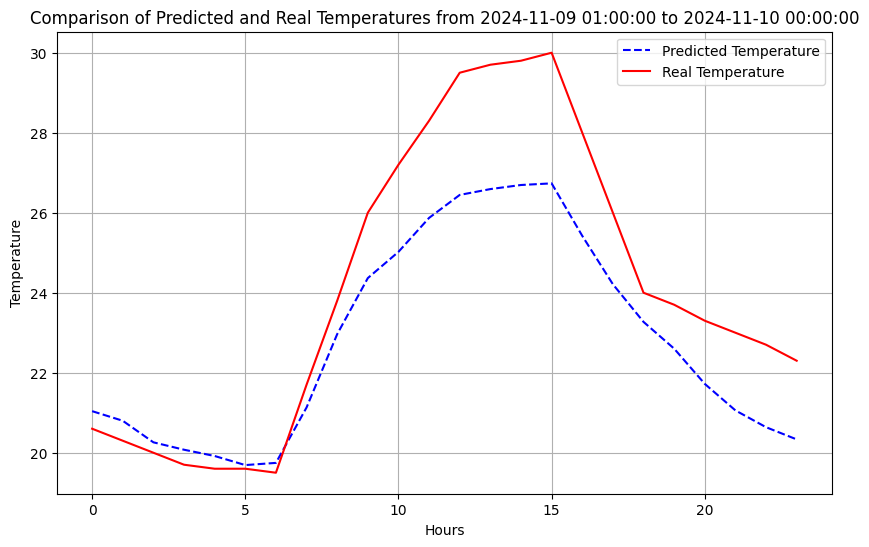

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ 2 đường
plt.figure(figsize=(10, 6))
plt.plot(pred_df['temperature'], label='Predicted Temperature', color='blue', linestyle='--')
plt.plot(real_df['temperature'], label='Real Temperature', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Temperatures from 2024-11-09 01:00:00 to 2024-11-10 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

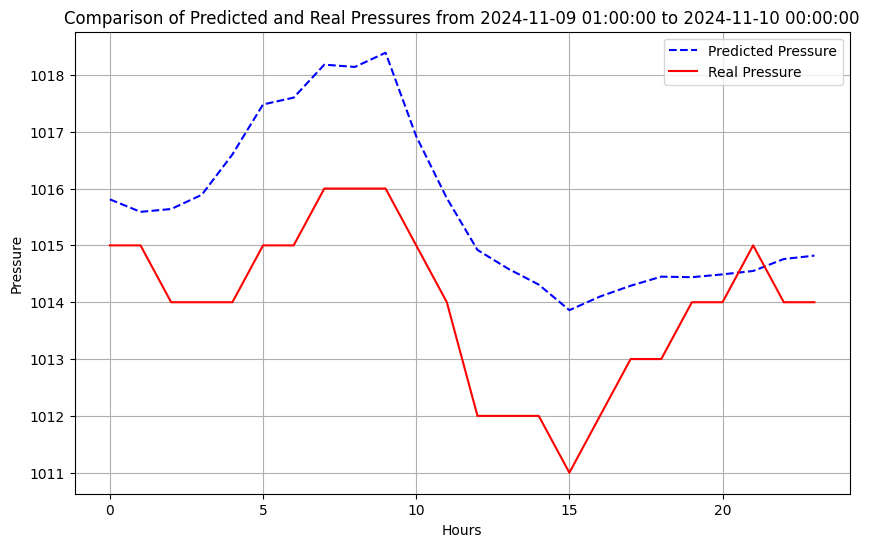

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['pressure'], label='Predicted Pressure', color='blue', linestyle='--')
plt.plot(real_df['pressure'], label='Real Pressure', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Pressures from 2024-11-09 01:00:00 to 2024-11-10 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Pressure')
plt.legend()
plt.grid(True)
plt.show()

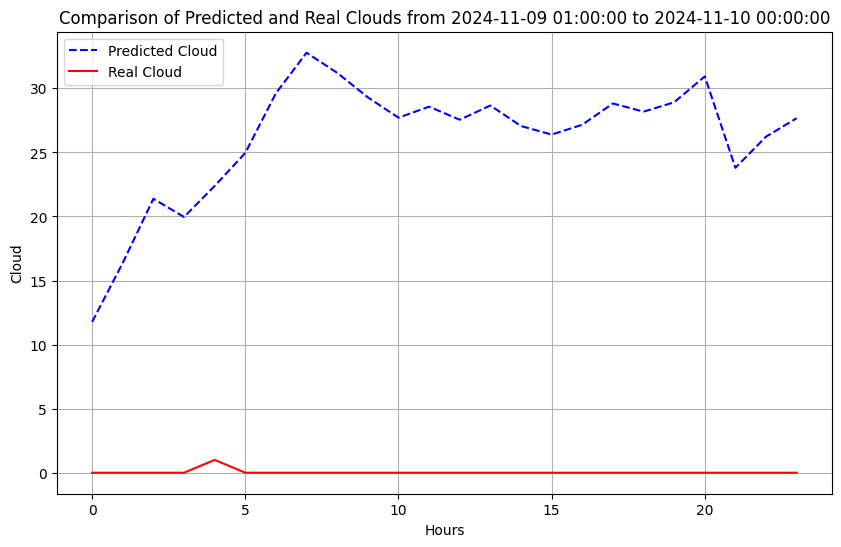

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['cloud'], label='Predicted Cloud', color='blue', linestyle='--')
plt.plot(real_df['cloud'], label='Real Cloud', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Clouds from 2024-11-09 01:00:00 to 2024-11-10 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Cloud')
plt.legend()
plt.grid(True)
plt.show()

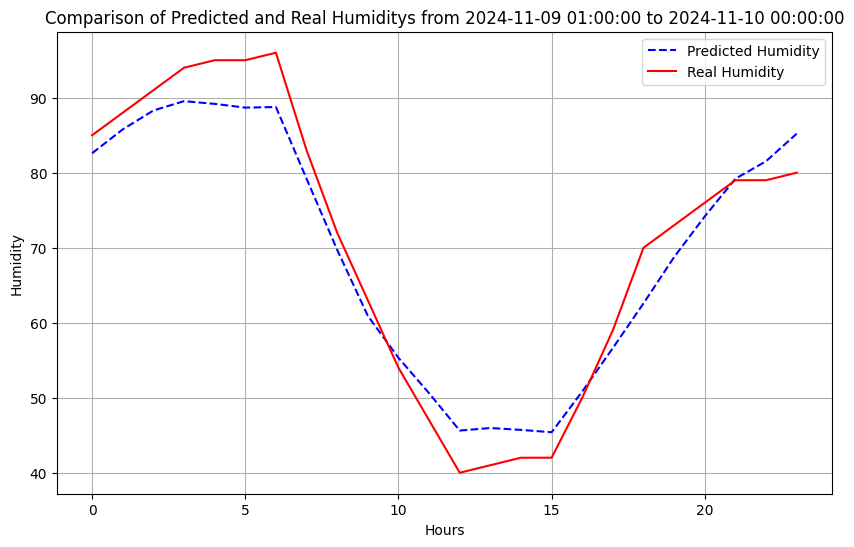

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['humidity'], label='Predicted Humidity', color='blue', linestyle='--')
plt.plot(real_df['humidity'], label='Real Humidity', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Humiditys from 2024-11-09 01:00:00 to 2024-11-10 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Humidity')
plt.legend()
plt.grid(True)
plt.show()

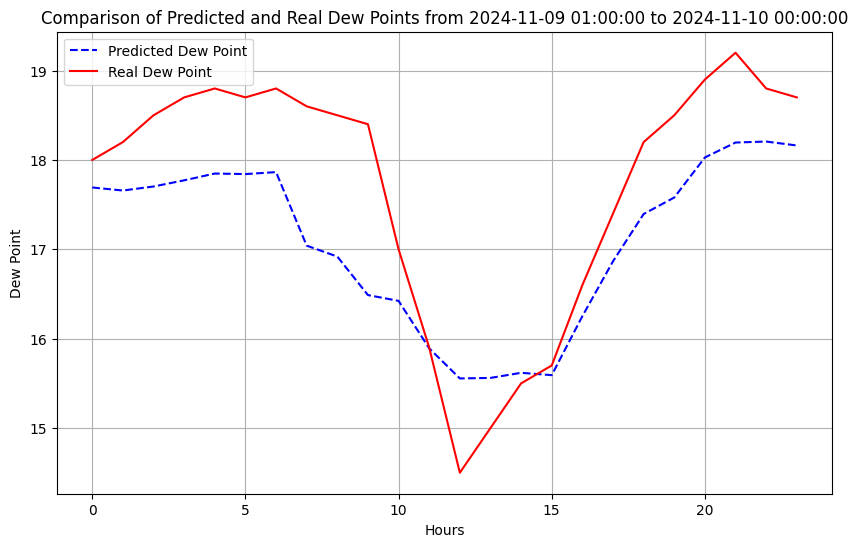

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['dew_point'], label='Predicted Dew Point', color='blue', linestyle='--')
plt.plot(real_df['dew_point'], label='Real Dew Point', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Dew Points from 2024-11-09 01:00:00 to 2024-11-10 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Dew Point')
plt.legend()
plt.grid(True)
plt.show()

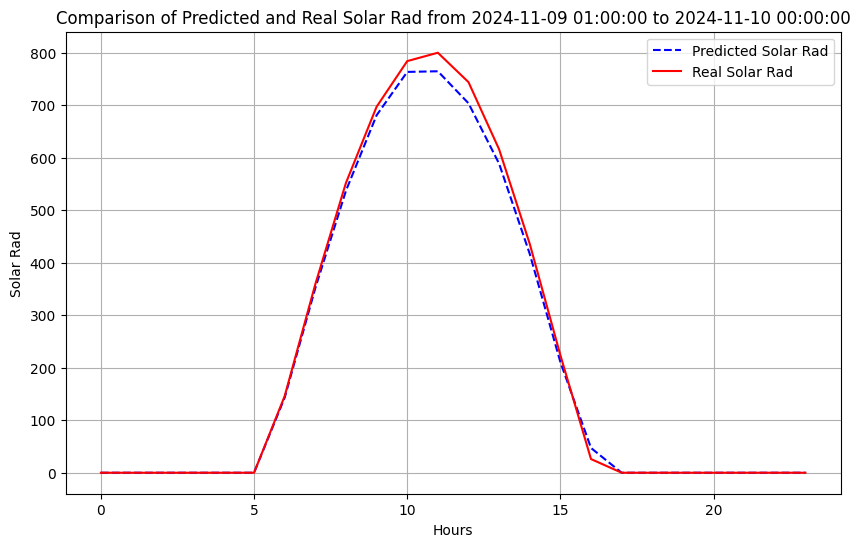

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['solar_rad'], label='Predicted Solar Rad', color='blue', linestyle='--')
plt.plot(real_df['solar_rad'], label='Real Solar Rad', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Solar Rad from 2024-11-09 01:00:00 to 2024-11-10 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Solar Rad')
plt.legend()
plt.grid(True)
plt.show()

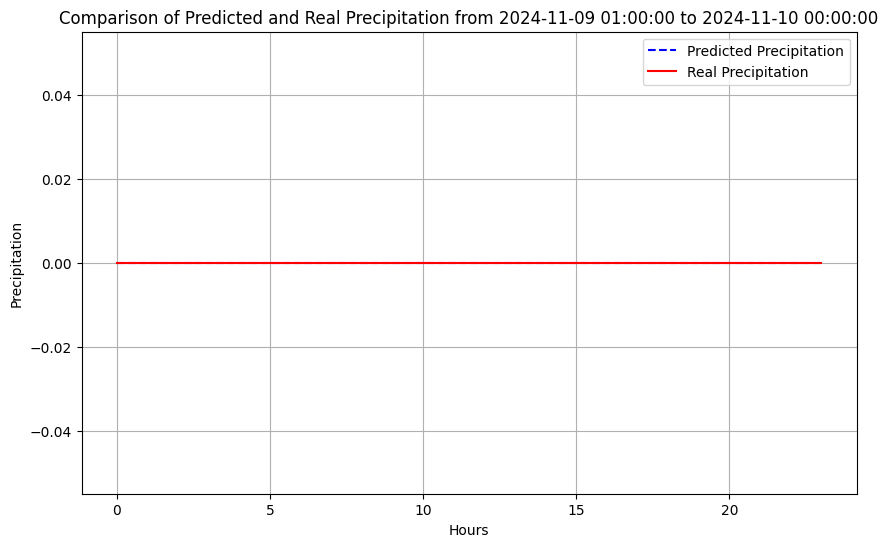

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['precipitation'], label='Predicted Precipitation', color='blue', linestyle='--')
plt.plot(real_df['precipitation'], label='Real Precipitation', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Precipitation from 2024-11-09 01:00:00 to 2024-11-10 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)
plt.show()

## **Thực nghiệm một ngày mưa (05/11/2024)**

In [ ]:
new_data = [[24.1, 1017, 100, 82, 20.8, 0, 0, 0, 5, 2024, 11, 5, 0]] #13 đặc trưng
pred = []
hour = 0
day = 5
month = 11
year = 2024
# a = 0.4952808820182761
# b = 0.635418108966886

pred_df = pd.DataFrame(columns = ['temperature', 'pressure', 'cloud', 'humidity', 'dew_point', 'solar_rad', 'precipitation', 'rain_hour', 'unrain_hour', 'year', 'month', 'day', 'hour'])
pred.append(new_data[0])

for i in range (1, 25):
    hour = hour + 1
    if hour > 23:
        hour = hour - 24
        day = day + 1

    if month in [4, 6, 9,11]:
        if day > 30:
            month = month + 1
            day = day - 30
    elif month in [1, 3, 5, 7, 8, 10, 12]:
        if day > 31:
            month = month + 1
            day = day - 31
    else:
        if day > 28:
            month = month + 1
            day = day - 28

    if month > 12:
        month = month - 12
        year = year + 1

    temp_pred = temp_rf_model.predict([pred[i - 1]])[0]
    pres_pred = pres_rf_model.predict([pred[i - 1]])[0]
    cloud_pred = cloud_rf_model.predict([pred[i - 1]])[0]
    rh_pred = rh_rf_model.predict([pred[i - 1]])[0]
    dewpt_pred = dewpt_rf_model.predict([pred[i - 1]])[0]
    solar_rad_pred = solar_rad_rf_model.predict([pred[i - 1]])[0]

    # rain_hour_pred = rain_hour_rf_model.predict([[pred[i - 1][10], pred[i - 1][11]]])
    rain_hour_pred = rain_hour_rf_model.predict([pred[i - 1]])[0]
    #rain_hour_pred = rain_hour_rf_model.predict([pred[i - 1]])[0]

    if rain_hour_pred == 0:
        precip_pred = 0
        rain_hour_pred = 0
        unrain_hour_pred = pred[i - 1][8] + 1
    else:
        rain_hour_pred = pred[i - 1][7] + 1
        unrain_hour_pred = 0
        pred2 = [temp_pred, pres_pred, cloud_pred, rh_pred, dewpt_pred, solar_rad_pred, rain_hour, unrain_hour_pred, year, month, day, hour]
        precip_pred = (a * precip1_rf_model.predict([pred[i-1]])[0]) + (b * precip2_rf_model.predict([pred2])[0])

    pred1 = [temp_pred, pres_pred, cloud_pred, rh_pred, dewpt_pred, solar_rad_pred, precip_pred, rain_hour_pred, unrain_hour_pred, year, month, day, hour]
    pred.append(pred1)
    new_row = {'temperature': temp_pred , 'pressure': pres_pred, 'cloud': cloud_pred, 'humidity': rh_pred, 'dew_point': dewpt_pred, 'solar_rad': solar_rad_pred, 'precipitation': precip_pred, 'rain_hour': rain_hour_pred, 'unrain_hour': unrain_hour_pred, 'year': year, 'month': month, 'day': day, 'hour': hour}
    new_row_df = pd.DataFrame([new_row])
    pred_df = pd.concat([pred_df, new_row_df], ignore_index = True)
pred_df

<ipython-input-338-2e5003ad732e>:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pred_df = pd.concat([pred_df, new_row_df], ignore_index = True)


,temperature,pressure,cloud,humidity,dew_point,solar_rad,precipitation,rain_hour,unrain_hour,year,month,day,hour
0,23.896,1016.71,98.84,82.03,20.590,0.00,0,0,6,2024,11,5,1
1,23.691,1016.68,93.53,81.82,20.496,0.00,0,0,7,2024,11,5,2
2,23.515,1016.82,90.85,81.52,20.235,0.00,0,0,8,2024,11,5,3
3,23.189,1016.82,91.00,81.07,19.994,0.00,0,0,9,2024,11,5,4
4,23.230,1017.58,88.96,79.99,19.718,0.00,0,0,10,2024,11,5,5
5,23.143,1018.59,85.87,78.86,19.483,0.00,0,0,11,2024,11,5,6
6,22.865,1019.49,82.34,78.83,19.189,74.31,0,0,12,2024,11,5,7
7,23.370,1019.35,75.33,72.05,18.431,184.19,0,0,13,2024,11,5,8
8,24.229,1019.35,67.83,65.07,17.740,345.96,0,0,14,2024,11,5,9
9,25.171,1019.38,68.35,57.33,17.467,454.82,0,0,15,2024,11,5,10


In [ ]:
real_df = test_df.iloc[90:114].reset_index(drop=True)
real_df

,temperature,pressure,cloud,humidity,dew_point,solar_rad,precipitation,rain_hour,unrain_hour,year,month,day,hour
0,23.9,1017,100,84,21.0,0,0.00,0.0,6.0,2024,11,5,1
1,23.6,1017,100,87,21.3,0,0.00,0.0,7.0,2024,11,5,2
2,23.4,1017,100,89,21.5,0,0.25,1.0,0.0,2024,11,5,3
3,23.2,1017,100,92,21.8,0,0.25,2.0,0.0,2024,11,5,4
4,23.5,1017,100,84,20.7,0,0.00,0.0,1.0,2024,11,5,5
5,23.9,1018,100,76,19.4,0,0.75,1.0,0.0,2024,11,5,6
6,24.2,1019,100,70,18.4,67,1.00,2.0,0.0,2024,11,5,7
7,24.7,1019,100,68,18.4,105,0.75,3.0,0.0,2024,11,5,8
8,25.2,1019,100,66,18.4,132,0.25,4.0,0.0,2024,11,5,9
9,25.7,1020,100,64,18.4,149,0.00,0.0,1.0,2024,11,5,10


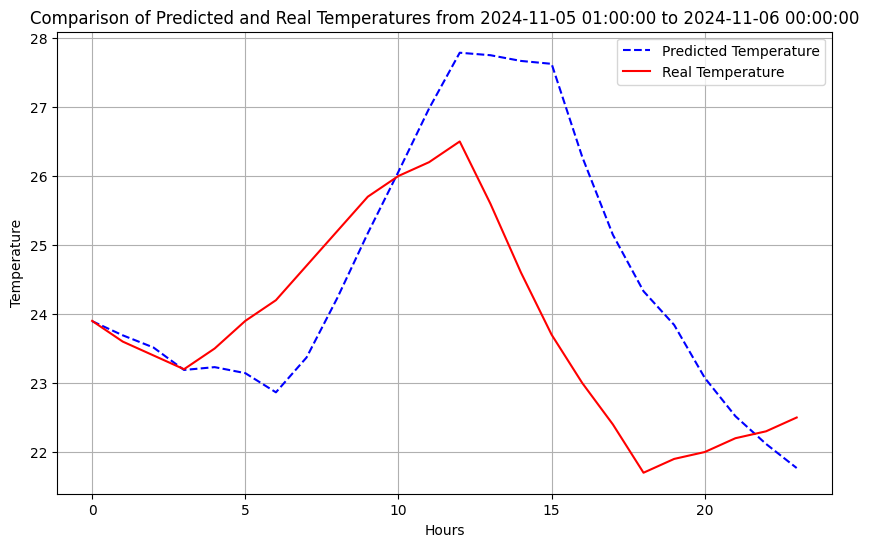

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ 2 đường
plt.figure(figsize=(10, 6))
plt.plot(pred_df['temperature'], label='Predicted Temperature', color='blue', linestyle='--')
plt.plot(real_df['temperature'], label='Real Temperature', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Temperatures from 2024-11-05 01:00:00 to 2024-11-06 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

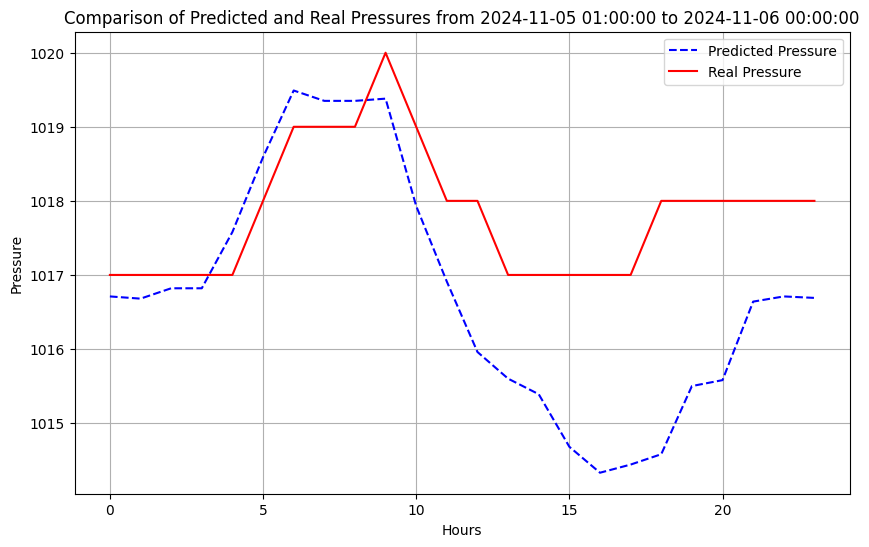

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['pressure'], label='Predicted Pressure', color='blue', linestyle='--')
plt.plot(real_df['pressure'], label='Real Pressure', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Pressures from 2024-11-05 01:00:00 to 2024-11-06 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Pressure')
plt.legend()
plt.grid(True)
plt.show()

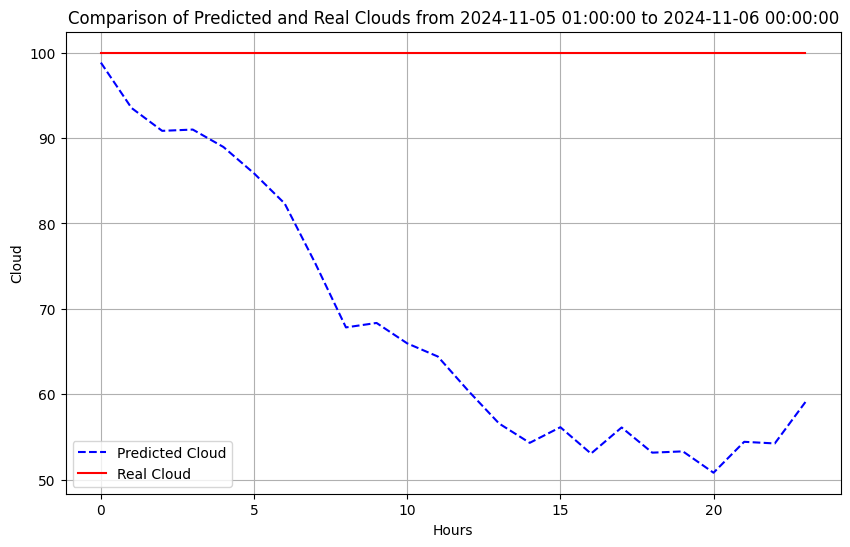

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['cloud'], label='Predicted Cloud', color='blue', linestyle='--')
plt.plot(real_df['cloud'], label='Real Cloud', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Clouds from 2024-11-05 01:00:00 to 2024-11-06 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Cloud')
plt.legend()
plt.grid(True)
plt.show()

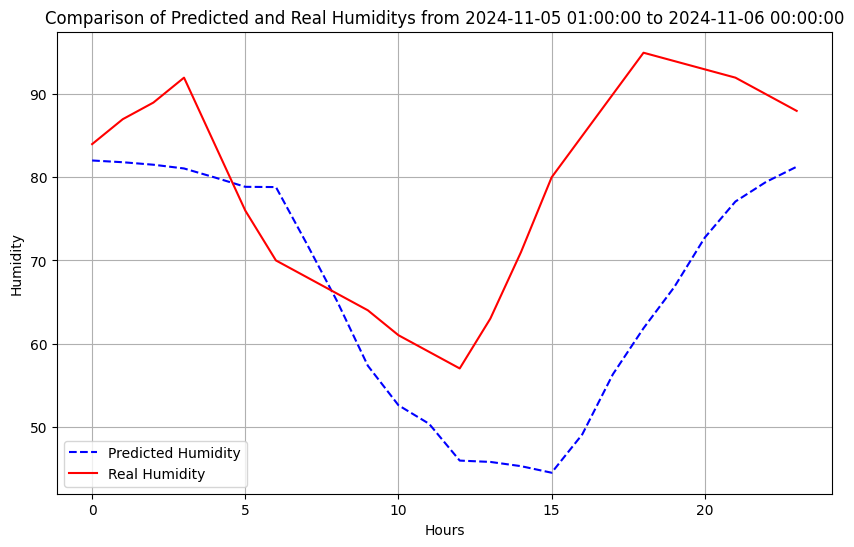

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['humidity'], label='Predicted Humidity', color='blue', linestyle='--')
plt.plot(real_df['humidity'], label='Real Humidity', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Humiditys from 2024-11-05 01:00:00 to 2024-11-06 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Humidity')
plt.legend()
plt.grid(True)
plt.show()

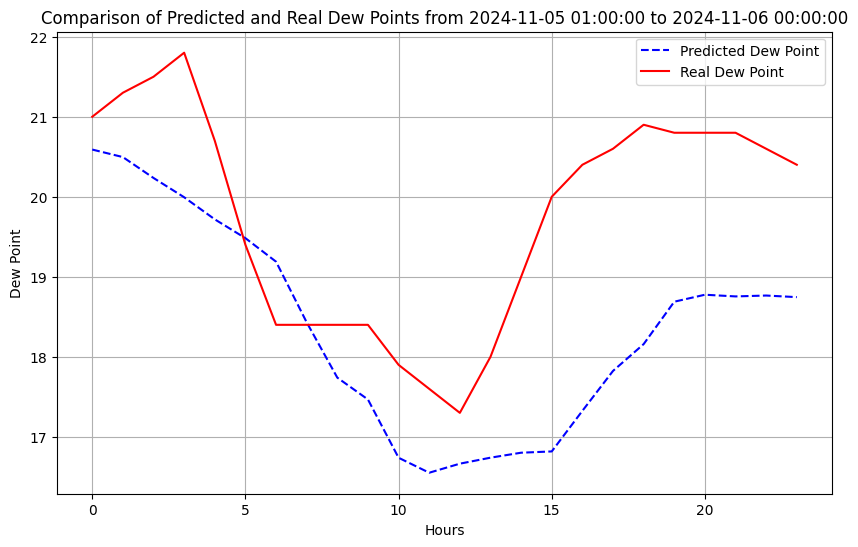

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['dew_point'], label='Predicted Dew Point', color='blue', linestyle='--')
plt.plot(real_df['dew_point'], label='Real Dew Point', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Dew Points from 2024-11-05 01:00:00 to 2024-11-06 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Dew Point')
plt.legend()
plt.grid(True)
plt.show()

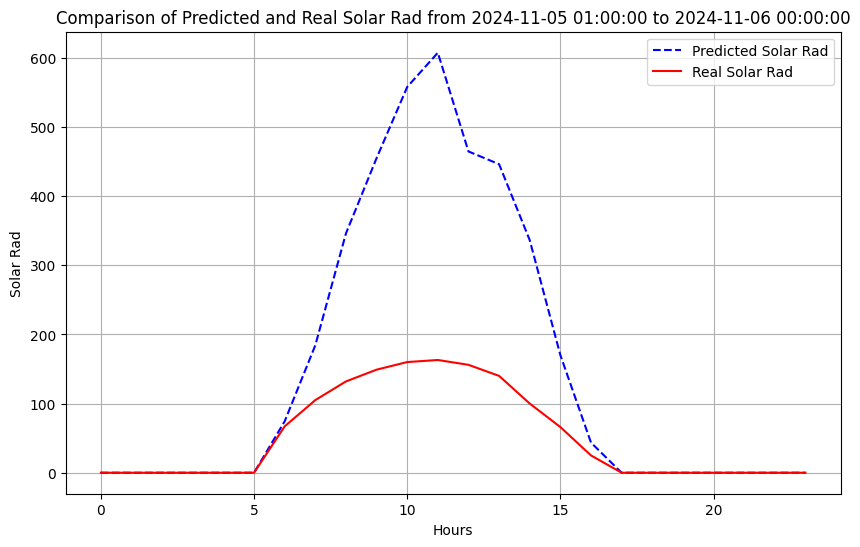

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['solar_rad'], label='Predicted Solar Rad', color='blue', linestyle='--')
plt.plot(real_df['solar_rad'], label='Real Solar Rad', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Solar Rad from 2024-11-05 01:00:00 to 2024-11-06 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Solar Rad')
plt.legend()
plt.grid(True)
plt.show()

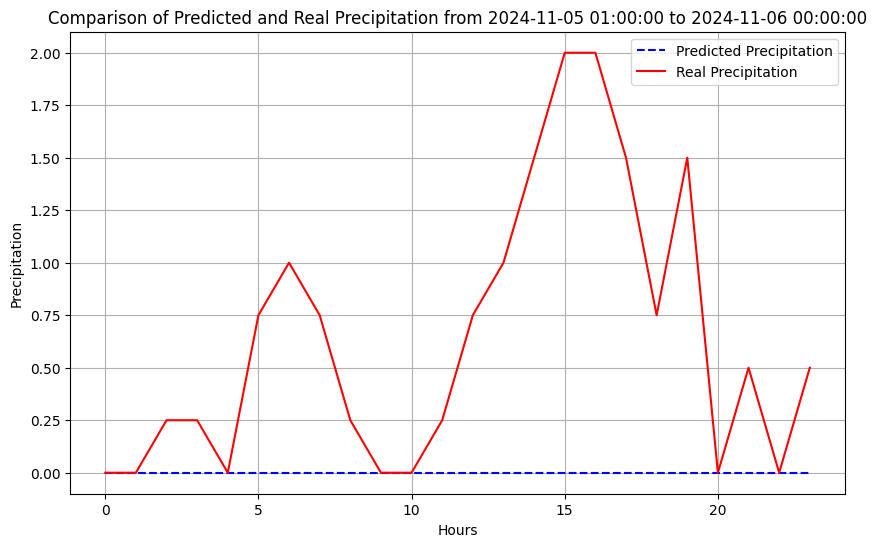

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['precipitation'], label='Predicted Precipitation', color='blue', linestyle='--')
plt.plot(real_df['precipitation'], label='Real Precipitation', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Precipitation from 2024-11-05 01:00:00 to 2024-11-06 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)
plt.show()

## **Thực nghiệm trong 3 ngày (15/11/2024 đến 17/11/2024)**

In [ ]:
new_data = [[25.6, 1009, 0, 90, 23.9, 0, 0, 0, 163, 2024, 11, 15, 0]] #13 đặc trưng
pred = []
hour = 0
day = 15
month = 11
year = 2024
# a = 0.4952808820182761
# b = 0.635418108966886

pred_df = pd.DataFrame(columns = ['temperature', 'pressure', 'cloud', 'humidity', 'dew_point', 'solar_rad', 'precipitation', 'rain_hour', 'unrain_hour', 'year', 'month', 'day', 'hour'])
pred.append(new_data[0])

for i in range (1, 73):
    hour = hour + 1
    if hour > 23:
        hour = hour - 24
        day = day + 1

    if month in [4, 6, 9,11]:
        if day > 30:
            month = month + 1
            day = day - 30
    elif month in [1, 3, 5, 7, 8, 10, 12]:
        if day > 31:
            month = month + 1
            day = day - 31
    else:
        if day > 28:
            month = month + 1
            day = day - 28

    if month > 12:
        month = month - 12
        year = year + 1

    temp_pred = temp_rf_model.predict([pred[i - 1]])[0]
    pres_pred = pres_rf_model.predict([pred[i - 1]])[0]
    cloud_pred = cloud_rf_model.predict([pred[i - 1]])[0]
    rh_pred = rh_rf_model.predict([pred[i - 1]])[0]
    dewpt_pred = dewpt_rf_model.predict([pred[i - 1]])[0]
    solar_rad_pred = solar_rad_rf_model.predict([pred[i - 1]])[0]

    # rain_hour_pred = rain_hour_rf_model.predict([[pred[i - 1][10], pred[i - 1][11]]])
    rain_hour_pred = rain_hour_rf_model.predict([pred[i - 1]])[0]
    #rain_hour_pred = rain_hour_rf_model.predict([pred[i - 1]])[0]

    if rain_hour_pred == 0:
        precip_pred = 0
        rain_hour_pred = 0
        unrain_hour_pred = pred[i - 1][8] + 1
    else:
        rain_hour_pred = pred[i - 1][7] + 1
        unrain_hour_pred = 0
        pred2 = [temp_pred, pres_pred, cloud_pred, rh_pred, dewpt_pred, solar_rad_pred, rain_hour, unrain_hour_pred, year, month, day, hour]
        precip_pred = (a * precip1_rf_model.predict([pred[i-1]])[0]) + (b * precip2_rf_model.predict([pred2])[0])

    pred1 = [temp_pred, pres_pred, cloud_pred, rh_pred, dewpt_pred, solar_rad_pred, precip_pred, rain_hour_pred, unrain_hour_pred, year, month, day, hour]
    pred.append(pred1)
    new_row = {'temperature': temp_pred , 'pressure': pres_pred, 'cloud': cloud_pred, 'humidity': rh_pred, 'dew_point': dewpt_pred, 'solar_rad': solar_rad_pred, 'precipitation': precip_pred, 'rain_hour': rain_hour_pred, 'unrain_hour': unrain_hour_pred, 'year': year, 'month': month, 'day': day, 'hour': hour}
    new_row_df = pd.DataFrame([new_row])
    pred_df = pd.concat([pred_df, new_row_df], ignore_index = True)
pred_df

<ipython-input-341-9096b44dc96b>:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pred_df = pd.concat([pred_df, new_row_df], ignore_index = True)


,temperature,pressure,cloud,humidity,dew_point,solar_rad,precipitation,rain_hour,unrain_hour,year,month,day,hour
0,25.497,1008.94,14.16,91.67,23.775,0.0,0,0,164,2024,11,15,1
1,25.333,1009.03,19.03,93.04,23.830,0.0,0,0,165,2024,11,15,2
2,25.077,1009.01,22.80,93.72,23.823,0.0,0,0,166,2024,11,15,3
3,24.970,1008.91,25.81,94.78,23.847,0.0,0,0,167,2024,11,15,4
4,25.057,1009.55,31.67,95.03,23.832,0.0,0,0,168,2024,11,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,28.135,1011.48,50.94,73.87,23.604,0.0,0,0,231,2024,11,17,20
68,27.449,1011.49,51.87,78.80,23.716,0.0,0,0,232,2024,11,17,21
69,26.842,1011.41,52.14,82.16,23.790,0.0,0,0,233,2024,11,17,22
70,26.391,1010.81,51.56,84.85,23.815,0.0,0,0,234,2024,11,17,23


In [ ]:
real_df = test_df.iloc[330:402].reset_index(drop=True)
real_df

,temperature,pressure,cloud,humidity,dew_point,solar_rad,precipitation,rain_hour,unrain_hour,year,month,day,hour
0,25.2,1008,70,93,24.0,0,0.00,0.0,164.0,2024,11,15,1
1,25.0,1008,71,93,23.8,0,0.00,0.0,165.0,2024,11,15,2
2,24.8,1008,72,94,23.8,0,0.00,0.0,166.0,2024,11,15,3
3,24.6,1008,72,94,23.6,0,0.00,0.0,167.0,2024,11,15,4
4,24.6,1009,73,94,23.6,0,0.00,0.0,168.0,2024,11,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,26.4,1013,37,73,21.2,0,0.00,0.0,231.0,2024,11,17,20
68,26.2,1013,43,75,21.4,0,0.25,1.0,0.0,2024,11,17,21
69,26.0,1014,50,77,21.7,0,0.25,2.0,0.0,2024,11,17,22
70,25.2,1014,56,82,21.9,0,0.00,0.0,1.0,2024,11,17,23


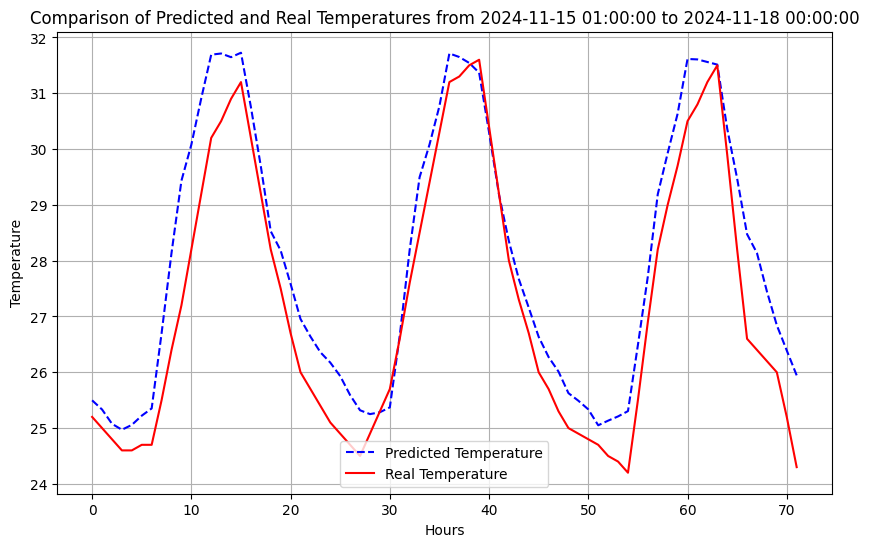

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ 2 đường
plt.figure(figsize=(10, 6))
plt.plot(pred_df['temperature'], label='Predicted Temperature', color='blue', linestyle='--')
plt.plot(real_df['temperature'], label='Real Temperature', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Temperatures from 2024-11-15 01:00:00 to 2024-11-18 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

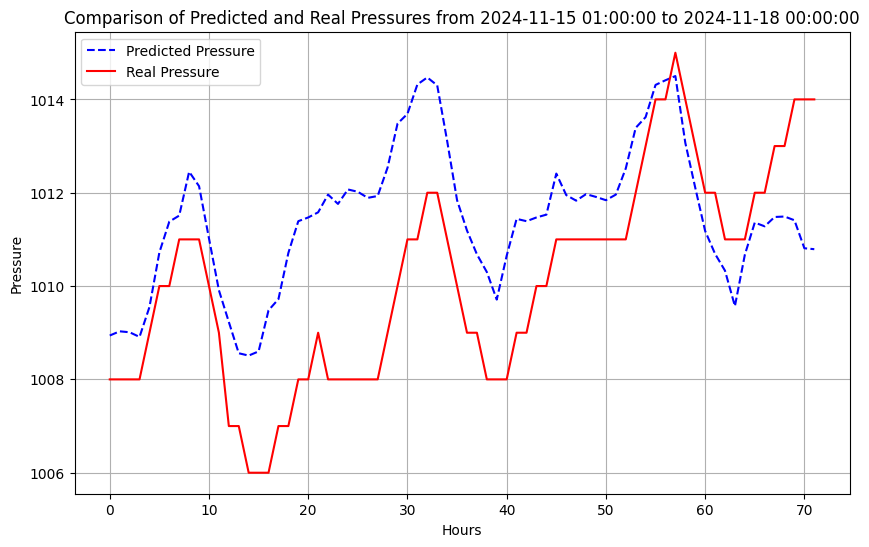

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['pressure'], label='Predicted Pressure', color='blue', linestyle='--')
plt.plot(real_df['pressure'], label='Real Pressure', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Pressures from 2024-11-15 01:00:00 to 2024-11-18 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Pressure')
plt.legend()
plt.grid(True)
plt.show()

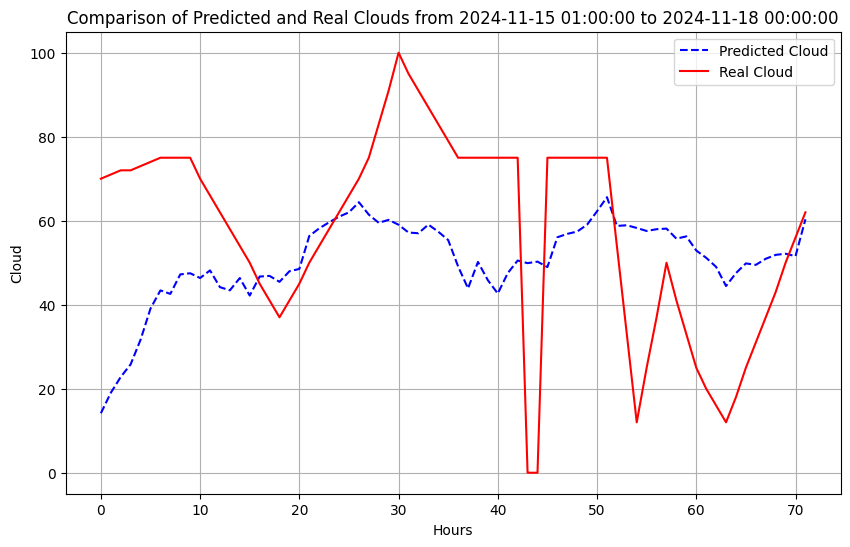

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['cloud'], label='Predicted Cloud', color='blue', linestyle='--')
plt.plot(real_df['cloud'], label='Real Cloud', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Clouds from 2024-11-15 01:00:00 to 2024-11-18 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Cloud')
plt.legend()
plt.grid(True)
plt.show()

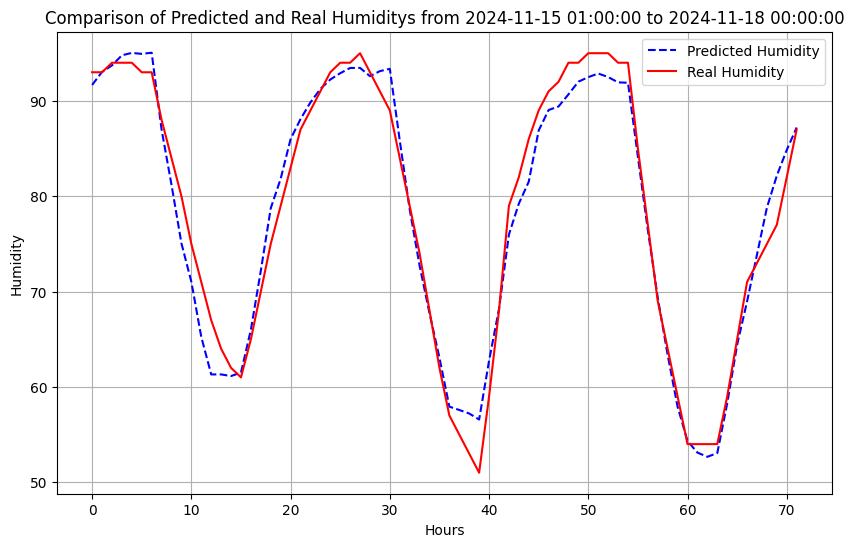

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['humidity'], label='Predicted Humidity', color='blue', linestyle='--')
plt.plot(real_df['humidity'], label='Real Humidity', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Humiditys from 2024-11-15 01:00:00 to 2024-11-18 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Humidity')
plt.legend()
plt.grid(True)
plt.show()

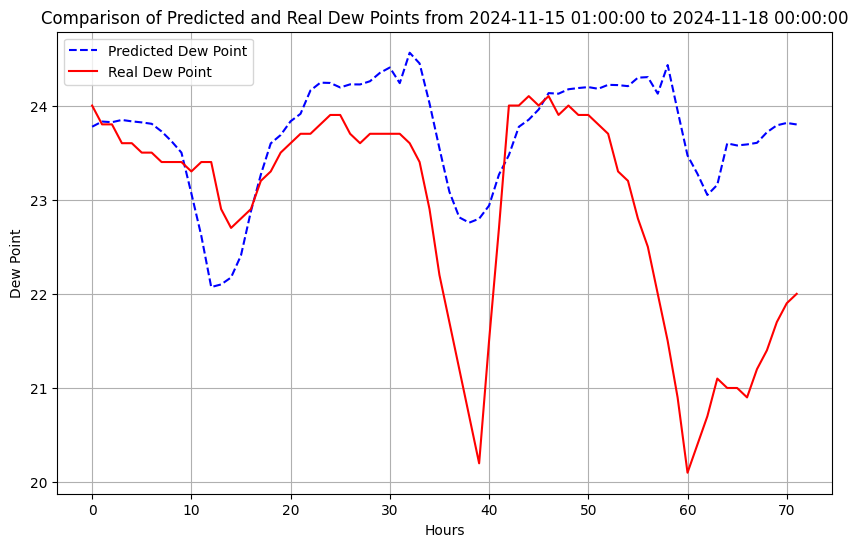

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['dew_point'], label='Predicted Dew Point', color='blue', linestyle='--')
plt.plot(real_df['dew_point'], label='Real Dew Point', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Dew Points from 2024-11-15 01:00:00 to 2024-11-18 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Dew Point')
plt.legend()
plt.grid(True)
plt.show()

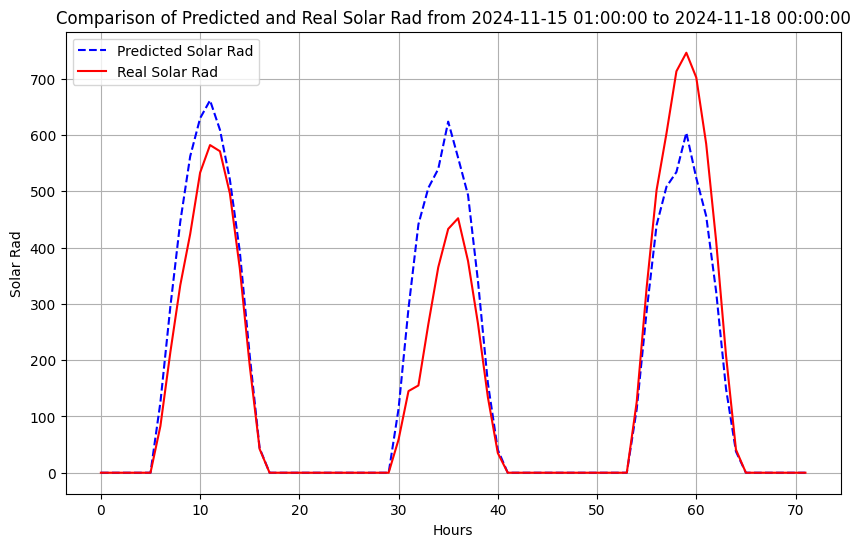

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['solar_rad'], label='Predicted Solar Rad', color='blue', linestyle='--')
plt.plot(real_df['solar_rad'], label='Real Solar Rad', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Solar Rad from 2024-11-15 01:00:00 to 2024-11-18 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Solar Rad')
plt.legend()
plt.grid(True)
plt.show()

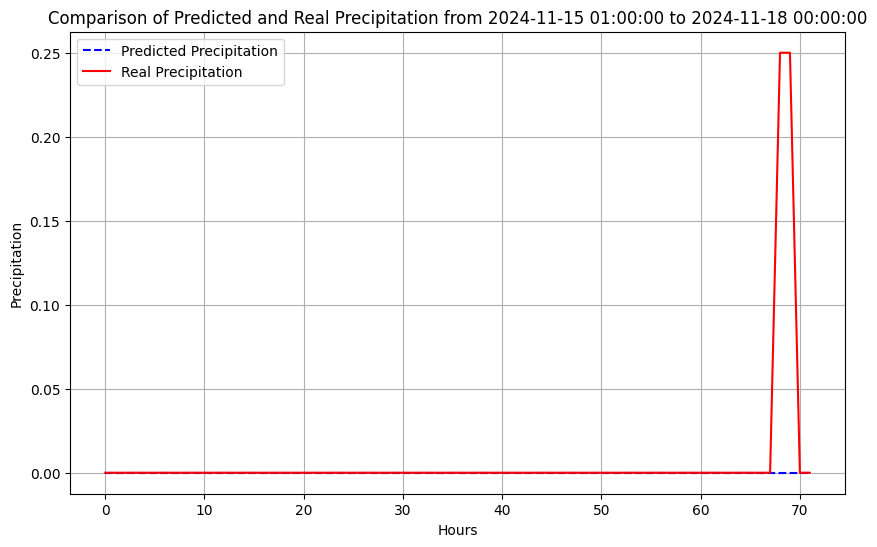

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['precipitation'], label='Predicted Precipitation', color='blue', linestyle='--')
plt.plot(real_df['precipitation'], label='Real Precipitation', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Precipitation from 2024-11-15 01:00:00 to 2024-11-18 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)
plt.show()

# **Thực nghiệm trong 7 ngày(22/11/2024 đến 29/11/2024)**

In [ ]:
new_data = [[21, 1018, 0, 73, 16, 0, 0, 0, 79, 2024, 11, 22, 0]] #13 đặc trưng
pred = []
hour = 0
day = 22
month = 11
year = 2024
# a = 0.4952808820182761
# b = 0.635418108966886

pred_df = pd.DataFrame(columns = ['temperature', 'pressure', 'cloud', 'humidity', 'dew_point', 'solar_rad', 'precipitation', 'rain_hour', 'unrain_hour', 'year', 'month', 'day', 'hour'])
pred.append(new_data[0])

for i in range (1, 169):
    hour = hour + 1
    if hour > 23:
        hour = hour - 24
        day = day + 1

    if month in [4, 6, 9,11]:
        if day > 30:
            month = month + 1
            day = day - 30
    elif month in [1, 3, 5, 7, 8, 10, 12]:
        if day > 31:
            month = month + 1
            day = day - 31
    else:
        if day > 28:
            month = month + 1
            day = day - 28

    if month > 12:
        month = month - 12
        year = year + 1

    temp_pred = temp_rf_model.predict([pred[i - 1]])[0]
    pres_pred = pres_rf_model.predict([pred[i - 1]])[0]
    cloud_pred = cloud_rf_model.predict([pred[i - 1]])[0]
    rh_pred = rh_rf_model.predict([pred[i - 1]])[0]
    dewpt_pred = dewpt_rf_model.predict([pred[i - 1]])[0]
    solar_rad_pred = solar_rad_rf_model.predict([pred[i - 1]])[0]

    # rain_hour_pred = rain_hour_rf_model.predict([[pred[i - 1][10], pred[i - 1][11]]])
    rain_hour_pred = rain_hour_rf_model.predict([pred[i - 1]])[0]
    #rain_hour_pred = rain_hour_rf_model.predict([pred[i - 1]])[0]

    if rain_hour_pred == 0:
        precip_pred = 0
        rain_hour_pred = 0
        unrain_hour_pred = pred[i - 1][8] + 1
    else:
        rain_hour_pred = pred[i - 1][7] + 1
        unrain_hour_pred = 0
        pred2 = [temp_pred, pres_pred, cloud_pred, rh_pred, dewpt_pred, solar_rad_pred, rain_hour, unrain_hour_pred, year, month, day, hour]
        precip_pred = (a * precip1_rf_model.predict([pred[i-1]])[0]) + (b * precip2_rf_model.predict([pred2])[0])

    pred1 = [temp_pred, pres_pred, cloud_pred, rh_pred, dewpt_pred, solar_rad_pred, precip_pred, rain_hour_pred, unrain_hour_pred, year, month, day, hour]
    pred.append(pred1)
    new_row = {'temperature': temp_pred , 'pressure': pres_pred, 'cloud': cloud_pred, 'humidity': rh_pred, 'dew_point': dewpt_pred, 'solar_rad': solar_rad_pred, 'precipitation': precip_pred, 'rain_hour': rain_hour_pred, 'unrain_hour': unrain_hour_pred, 'year': year, 'month': month, 'day': day, 'hour': hour}
    new_row_df = pd.DataFrame([new_row])
    pred_df = pd.concat([pred_df, new_row_df], ignore_index = True)
pred_df

<ipython-input-344-0406ce855551>:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pred_df = pd.concat([pred_df, new_row_df], ignore_index = True)


,temperature,pressure,cloud,humidity,dew_point,solar_rad,precipitation,rain_hour,unrain_hour,year,month,day,hour
0,20.770,1017.70,27.39,75.42,15.684,0.0,0,0,80,2024,11,22,1
1,20.468,1017.79,27.70,76.45,15.694,0.0,0,0,81,2024,11,22,2
2,20.095,1017.78,27.46,77.73,15.690,0.0,0,0,82,2024,11,22,3
3,19.732,1017.70,26.04,76.99,15.714,0.0,0,0,83,2024,11,22,4
4,19.509,1018.38,26.40,77.44,15.683,0.0,0,0,84,2024,11,22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,24.404,1011.48,43.99,79.51,21.161,0.0,0,0,243,2024,11,28,20
164,23.722,1011.50,44.25,83.62,21.194,0.0,0,0,244,2024,11,28,21
165,23.402,1011.40,43.52,88.43,21.159,0.0,0,0,245,2024,11,28,22
166,23.163,1010.60,47.26,89.67,21.129,0.0,0,0,246,2024,11,28,23


In [ ]:
real_df = test_df.iloc[498:666].reset_index(drop=True)
real_df

,temperature,pressure,cloud,humidity,dew_point,solar_rad,precipitation,rain_hour,unrain_hour,year,month,day,hour
0,20.0,1018,28,77,15.8,0,0.0,0.0,80.0,2024,11,22,1
1,20.0,1018,28,72,14.8,0,0.0,0.0,81.0,2024,11,22,2
2,21.1,1019,27,65,14.2,0,0.0,0.0,82.0,2024,11,22,3
3,21.1,1019,26,65,14.2,0,0.0,0.0,83.0,2024,11,22,4
4,21.0,1019,26,65,14.2,0,0.0,0.0,84.0,2024,11,22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,19.4,1023,41,57,10.7,0,0.0,0.0,4.0,2024,11,28,20
164,19.4,1023,58,63,12.1,0,0.0,0.0,5.0,2024,11,28,21
165,19.3,1024,75,70,13.7,0,0.0,0.0,6.0,2024,11,28,22
166,19.3,1023,83,70,13.7,0,0.0,0.0,7.0,2024,11,28,23


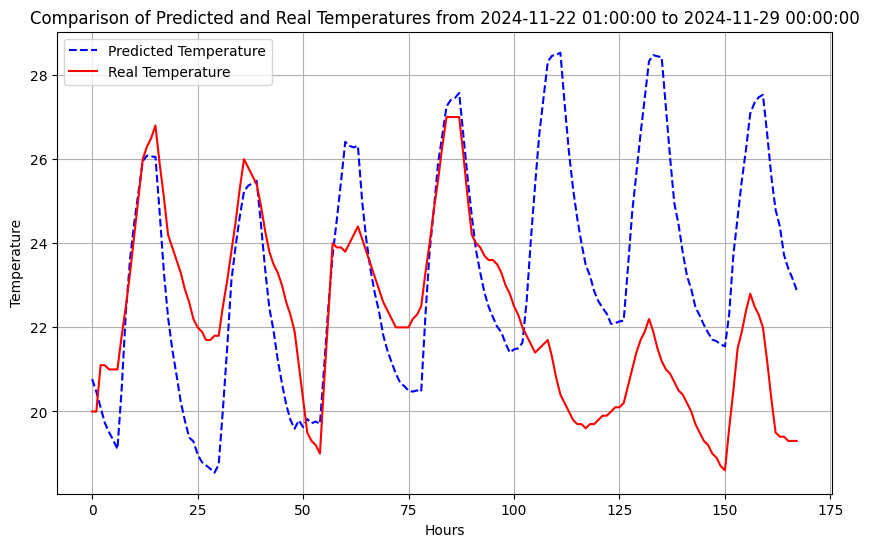

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ 2 đường
plt.figure(figsize=(10, 6))
plt.plot(pred_df['temperature'], label='Predicted Temperature', color='blue', linestyle='--')
plt.plot(real_df['temperature'], label='Real Temperature', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Temperatures from 2024-11-22 01:00:00 to 2024-11-29 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

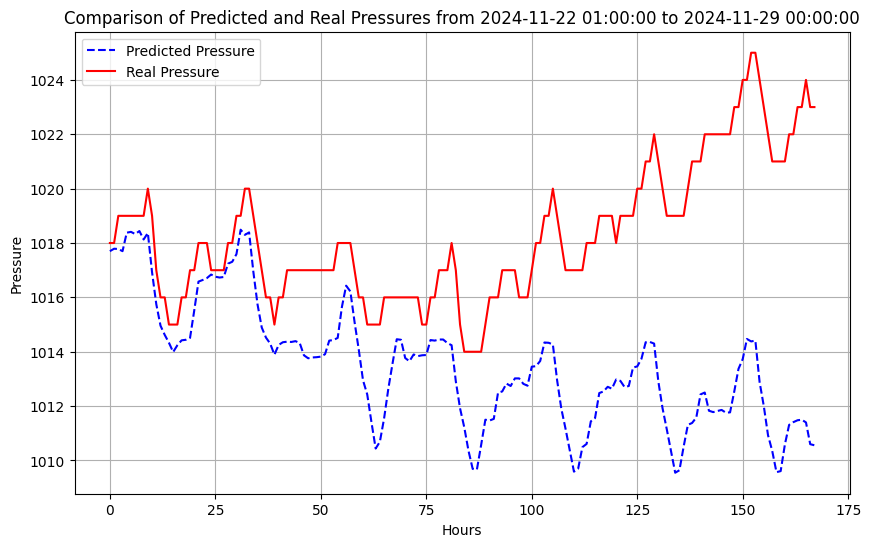

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['pressure'], label='Predicted Pressure', color='blue', linestyle='--')
plt.plot(real_df['pressure'], label='Real Pressure', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Pressures from 2024-11-22 01:00:00 to 2024-11-29 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Pressure')
plt.legend()
plt.grid(True)
plt.show()

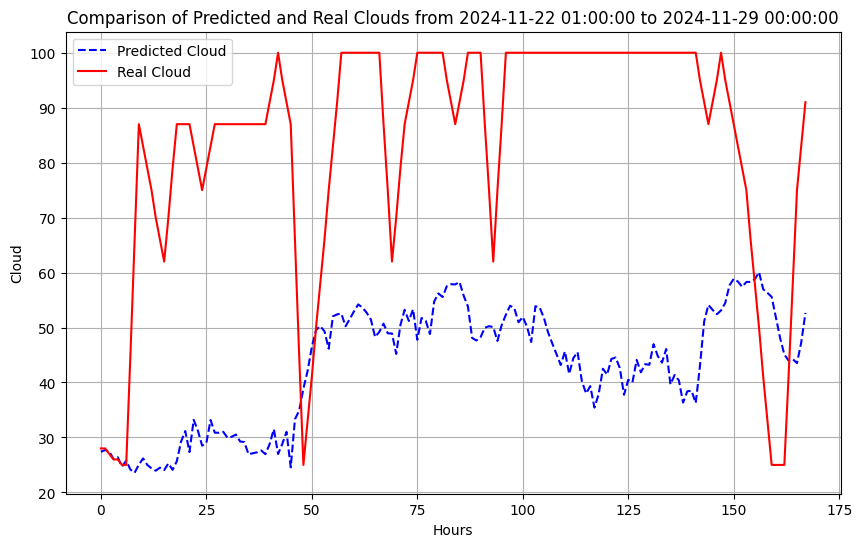

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['cloud'], label='Predicted Cloud', color='blue', linestyle='--')
plt.plot(real_df['cloud'], label='Real Cloud', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Clouds from 2024-11-22 01:00:00 to 2024-11-29 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Cloud')
plt.legend()
plt.grid(True)
plt.show()

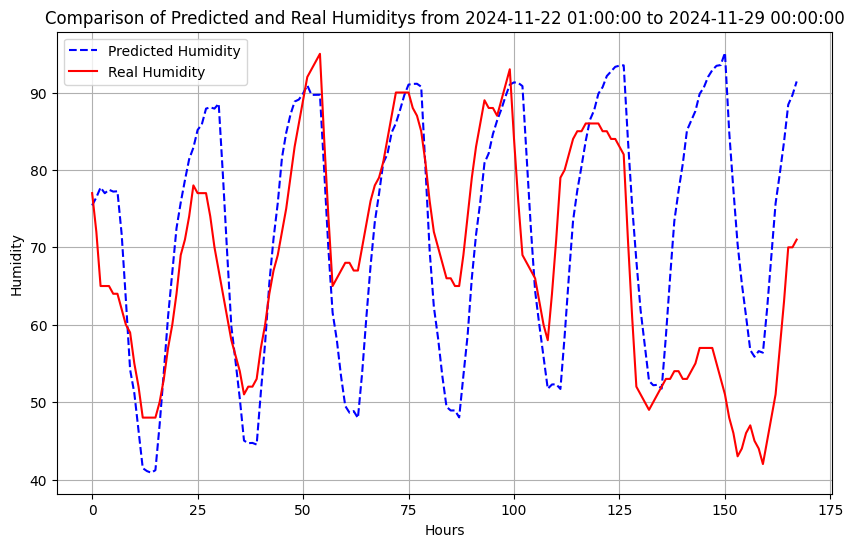

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['humidity'], label='Predicted Humidity', color='blue', linestyle='--')
plt.plot(real_df['humidity'], label='Real Humidity', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Humiditys from 2024-11-22 01:00:00 to 2024-11-29 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Humidity')
plt.legend()
plt.grid(True)
plt.show()

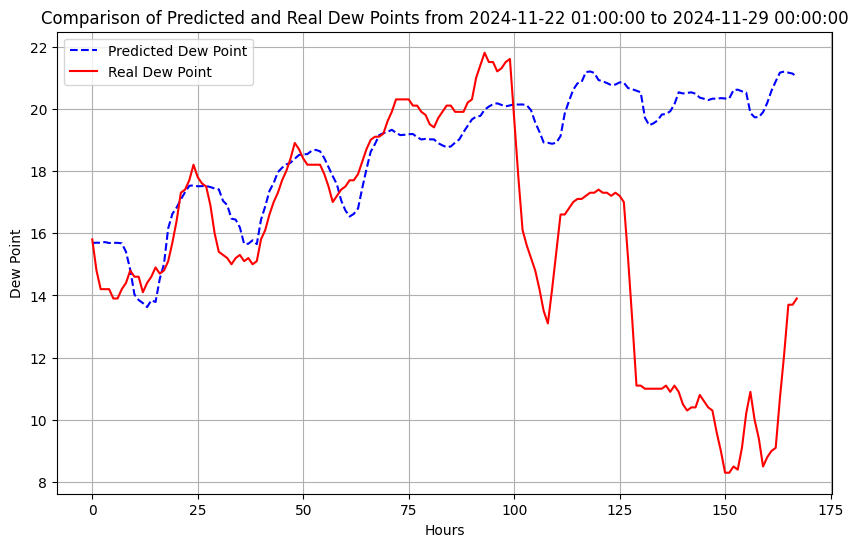

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['dew_point'], label='Predicted Dew Point', color='blue', linestyle='--')
plt.plot(real_df['dew_point'], label='Real Dew Point', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Dew Points from 2024-11-22 01:00:00 to 2024-11-29 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Dew Point')
plt.legend()
plt.grid(True)
plt.show()

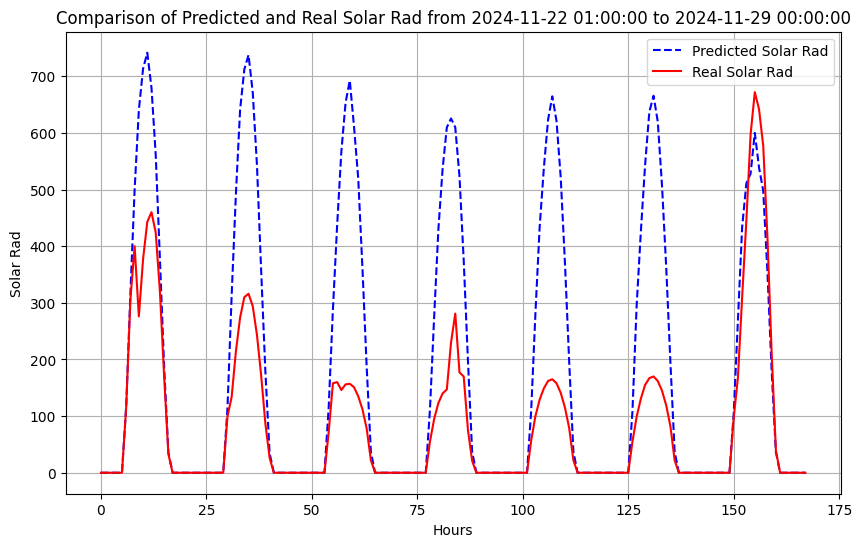

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['solar_rad'], label='Predicted Solar Rad', color='blue', linestyle='--')
plt.plot(real_df['solar_rad'], label='Real Solar Rad', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Solar Rad from 2024-11-22 01:00:00 to 2024-11-29 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Solar Rad')
plt.legend()
plt.grid(True)
plt.show()

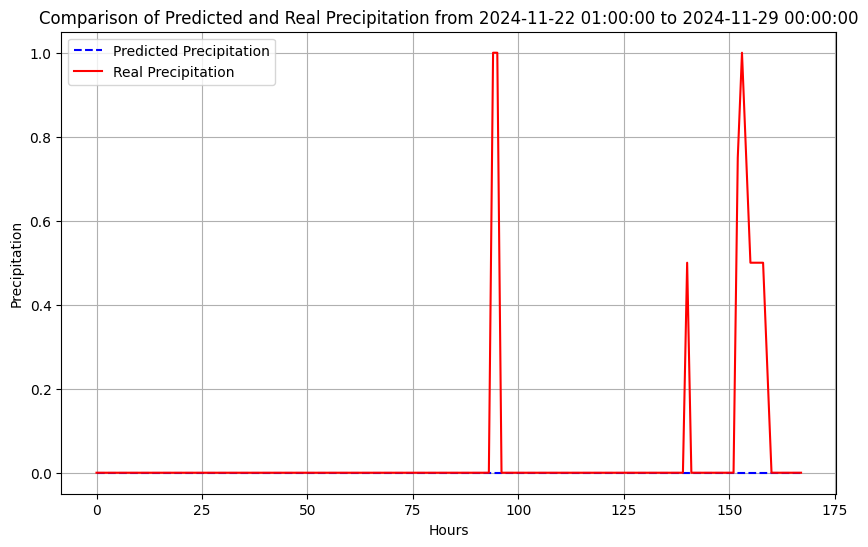

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['precipitation'], label='Predicted Precipitation', color='blue', linestyle='--')
plt.plot(real_df['precipitation'], label='Real Precipitation', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Precipitation from 2024-11-22 01:00:00 to 2024-11-29 00:00:00')
plt.xlabel('Hours')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)
plt.show()

# **Các thuật toán khác**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Chuẩn bị dữ liệu
rain_hour1_X = train_df
rain_hour1_X = rain_hour1_X.iloc[:-1].reset_index(drop=True)
rain_hour1_y = train_df['precipitation']
rain_hour1_y = rain_hour1_y.iloc[1:].reset_index(drop=True)
rain_hour1_y = (rain_hour1_y > 0).astype(int)

rain_hour1_X_train, rain_hour1_X_test, rain_hour1_y_train, rain_hour1_y_test = train_test_split(rain_hour1_X, rain_hour1_y, test_size=0.2, random_state=42)

# Sử dụng SMOTE để xử lý mất cân bằng lớp
smote = SMOTE(random_state=42)
X1_resampled, y1_resampled = smote.fit_resample(rain_hour1_X_train, rain_hour1_y_train)

# Áp dụng KMeans clustering (số lượng cụm có thể thử nghiệm)
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(X1_resampled)

# Lấy các nhãn cụm và thêm vào dữ liệu
X1_resampled['cluster'] = kmeans.labels_

# Xây dựng mô hình Random Forest
rain_hour1_rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, class_weight='balanced', random_state=42)
rain_hour1_rf_model.fit(X1_resampled, y1_resampled)

# Dự đoán trên tập kiểm tra
rain_hour1_X_test['cluster'] = kmeans.predict(rain_hour1_X_test)  # Dự đoán các cụm cho dữ liệu test
rain_hour1_y_pred = rain_hour1_rf_model.predict(rain_hour1_X_test)

# Đánh giá mô hình
rain_hour1_accuracy = accuracy_score(rain_hour1_y_test, rain_hour1_y_pred)
print(f"Accuracy: {rain_hour1_accuracy:.2f}")

# Ma trận nhầm lẫn
rain_hour1_conf_matrix = confusion_matrix(rain_hour1_y_test, rain_hour1_y_pred)
print(f"Confusion Matrix:\n{rain_hour1_conf_matrix}")

# Precision, Recall, F1-Score
precision = precision_score(rain_hour1_y_test, rain_hour1_y_pred)
recall = recall_score(rain_hour1_y_test, rain_hour1_y_pred)
f1 = f1_score(rain_hour1_y_test, rain_hour1_y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# AUC (Area Under Curve) for ROC
rain_hour1_y_pred_prob = rain_hour1_rf_model.predict_proba(rain_hour1_X_test)[:, 1]  # Probabilities for the positive class
auc = roc_auc_score(rain_hour1_y_test, rain_hour1_y_pred_prob)
print(f"AUC: {auc:.2f}")

# Log Loss
logloss = log_loss(rain_hour1_y_test, rain_hour1_y_pred_prob)
print(f"Log Loss: {logloss:.2f}")

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(rain_hour1_y_test, rain_hour1_y_pred)
print(f"MCC: {mcc:.2f}")


Accuracy: 0.92
Confusion Matrix:
[[34479  1780]
 [ 1877  5405]]
Precision: 0.75
Recall: 0.74
F1-Score: 0.75
AUC: 0.93
Log Loss: 0.25
MCC: 0.70


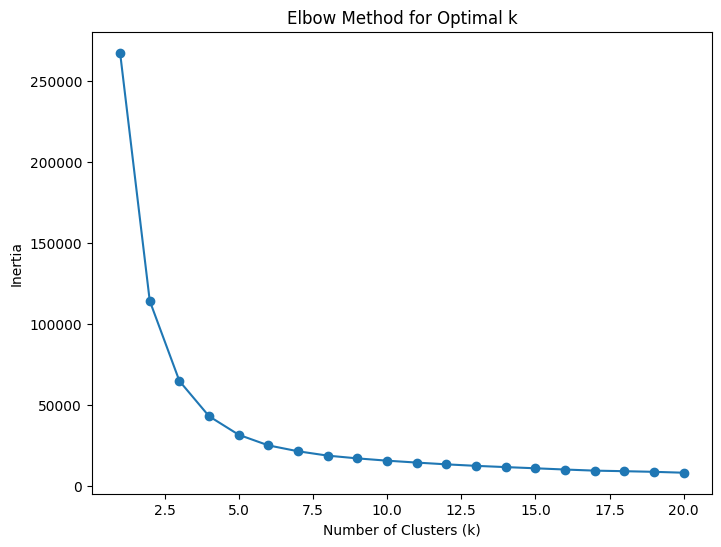

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Dữ liệu mẫu
X1 = rain_hour1_X_train  # Hoặc dữ liệu bạn đang sử dụng

# Lặp qua các giá trị k từ 1 đến 10 (hoặc một phạm vi lớn hơn nếu cần)
inertia = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Vẽ đồ thị Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, log_loss, matthews_corrcoef
)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Chuẩn bị dữ liệu
rain_hour2_X = train_df
rain_hour2_X = rain_hour2_X.iloc[:-1].reset_index(drop=True)
rain_hour2_y = train_df['precipitation']
rain_hour2_y = rain_hour2_y.iloc[1:].reset_index(drop=True)
rain_hour2_y = (rain_hour2_y > 0).astype(int)

rain_hour2_X_train, rain_hour2_X_test, rain_hour2_y_train, rain_hour2_y_test = train_test_split(rain_hour2_X, rain_hour2_y, test_size=0.2, random_state=42)

# Áp dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X2_resampled, y2_resampled = smote.fit_resample(rain_hour2_X_train, rain_hour2_y_train)

# Xây dựng mô hình XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.01,
    scale_pos_weight=1,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

xgb_model.fit(X2_resampled, y2_resampled)

# Dự đoán
rain_hour2_y_pred = xgb_model.predict(rain_hour2_X_test)
rain_hour2_y_pred_prob = xgb_model.predict_proba(rain_hour2_X_test)[:, 1]

# Đánh giá hiệu suất
rain_hour2_accuracy = accuracy_score(rain_hour2_y_test, rain_hour2_y_pred)
print(f"Accuracy: {rain_hour2_accuracy:.2f}")

# Ma trận nhầm lẫn (confusion matrix)
rain_hour2_conf_matrix = confusion_matrix(rain_hour2_y_test, rain_hour2_y_pred)
print(f"Confusion Matrix:\n{rain_hour2_conf_matrix}")

# Precision, Recall, F1-Score
precision = precision_score(rain_hour2_y_test, rain_hour2_y_pred)
recall = recall_score(rain_hour2_y_test, rain_hour2_y_pred)
f1 = f1_score(rain_hour2_y_test, rain_hour2_y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# AUC (Area Under Curve) for ROC
auc = roc_auc_score(rain_hour2_y_test, rain_hour2_y_pred_prob)
print(f"AUC: {auc:.2f}")

# Log Loss
logloss = log_loss(rain_hour2_y_test, rain_hour2_y_pred_prob)
print(f"Log Loss: {logloss:.2f}")

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(rain_hour2_y_test, rain_hour2_y_pred)
print(f"MCC: {mcc:.2f}")


Accuracy: 0.92
Confusion Matrix:
[[34420  1839]
 [ 1750  5532]]
Precision: 0.75
Recall: 0.76
F1-Score: 0.76
AUC: 0.93
Log Loss: 0.37
MCC: 0.71


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, log_loss, matthews_corrcoef
)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Chuẩn bị dữ liệu
#rain_hour3_X = train_df[['rain_hour','unrain_hour']]
rain_hour3_X = train_df
rain_hour3_X = rain_hour3_X.iloc[:-1].reset_index(drop=True)
rain_hour3_y = train_df['precipitation']
rain_hour3_y = rain_hour3_y.iloc[1:].reset_index(drop=True)
rain_hour3_y = (rain_hour3_y > 0).astype(int)

rain_hour3_X_train, rain_hour3_X_test, rain_hour3_y_train, rain_hour3_y_test = train_test_split(rain_hour3_X, rain_hour3_y, test_size=0.2, random_state=42)

# Áp dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X3_resampled, y3_resampled = smote.fit_resample(rain_hour3_X_train, rain_hour3_y_train)

# Xây dựng mô hình Logistic Regression
log_reg_model = LogisticRegression(
    solver='liblinear',  # Sử dụng solver phù hợp cho dữ liệu nhỏ
    class_weight='balanced',  # Cân bằng dữ liệu nếu cần
    random_state=42
)

log_reg_model.fit(X3_resampled, y3_resampled)

# Dự đoán
rain_hour3_y_pred = log_reg_model.predict(rain_hour3_X_test)
rain_hour3_y_pred_prob = log_reg_model.predict_proba(rain_hour3_X_test)[:, 1]

# Đánh giá hiệu suất
rain_hour3_accuracy = accuracy_score(rain_hour3_y_test, rain_hour3_y_pred)
print(f"Accuracy: {rain_hour3_accuracy:.2f}")

# Ma trận nhầm lẫn (confusion matrix)
rain_hour3_conf_matrix = confusion_matrix(rain_hour3_y_test, rain_hour3_y_pred)
print(f"Confusion Matrix:\n{rain_hour3_conf_matrix}")

# Precision, Recall, F1-Score
precision = precision_score(rain_hour3_y_test, rain_hour3_y_pred)
recall = recall_score(rain_hour3_y_test, rain_hour3_y_pred)
f1 = f1_score(rain_hour3_y_test, rain_hour3_y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# AUC (Area Under Curve) for ROC
auc = roc_auc_score(rain_hour3_y_test, rain_hour3_y_pred_prob)
print(f"AUC: {auc:.2f}")

# Log Loss
logloss = log_loss(rain_hour3_y_test, rain_hour3_y_pred_prob)
print(f"Log Loss: {logloss:.2f}")

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(rain_hour3_y_test, rain_hour3_y_pred)
print(f"MCC: {mcc:.2f}")

Accuracy: 0.92
Confusion Matrix:
[[34487  1772]
 [ 1774  5508]]
Precision: 0.76
Recall: 0.76
F1-Score: 0.76
AUC: 0.92
Log Loss: 0.35
MCC: 0.71


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Chuẩn bị dữ liệu
precip3_X = train_df.drop(['precipitation'], axis = 1)
precip3_y = train_df['precipitation']

precip3_X_train, precip3_X_test, precip3_y_train, precip3_y_test = train_test_split(precip3_X, precip3_y, test_size=0.2, random_state=42)

# Xây dựng mô hình XGBoost
precip3_xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.01,
    random_state=42
)

# Huấn luyện mô hình
precip3_xgb_model.fit(precip3_X_train, precip3_y_train)

# Dự đoán
precip3_y_pred = precip3_xgb_model.predict(precip3_X_test)

# Đánh giá hiệu suất
precip3_mse = mean_squared_error(precip3_y_test, precip3_y_pred)
precip3_rmse = np.sqrt(precip3_mse)
precip3_me = np.mean(precip3_y_test - precip3_y_pred)
precip3_mae = mean_absolute_error(precip3_y_test, precip3_y_pred)
precip3_r2 = r2_score(precip3_y_test, precip3_y_pred)
precip3_r = np.corrcoef(precip3_y_test, precip3_y_pred)[0, 1]

# In ra kết quả
print(f"Mean Error (ME): {precip3_me:.2f}")
print(f"Mean Absolute Error (MAE): {precip3_mae:.2f}")
print(f"Mean Squared Error (MSE): {precip3_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {precip3_rmse:.2f}")
print(f"R^2 Score: {precip3_r2:.2f}")
print(f"Correlation Coefficient (R): {precip3_r:.2f}")

Mean Error (ME): -0.00
Mean Absolute Error (MAE): 0.12
Mean Squared Error (MSE): 0.34
Root Mean Squared Error (RMSE): 0.58
R^2 Score: 0.61
Correlation Coefficient (R): 0.78
